In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import csv

%matplotlib inline

In [11]:
def lorentzian_dip(frequencies, centre, FWHM, height, amplitude):
    return -amplitude*(1/(1 + ((frequencies - centre)/(FWHM / 2))**2)) + height

In [12]:
def lorentzian(frequencies, centre, FWHM, height, amplitude):
    return amplitude*(1/(1 + ((frequencies - centre)/(FWHM / 2))**2)) + height

In [13]:
def double_lorentzian_dip(frequencies, height, centre_1, FWHM_1, amplitude_1, centre_2, FWHM_2, amplitude_2):
    return -amplitude_1*(1/(1 + ((frequencies - centre_1)/(FWHM_1 / 2))**2)) -amplitude_2*(1/(1 + ((frequencies - centre_2)/(FWHM_2 / 2))**2)) + height

In [14]:
def four_lorentzian_dip(frequencies, height, centre_1, FWHM_1, amplitude_1, centre_2, FWHM_2, amplitude_2, centre_3, FWHM_3, amplitude_3, centre_4, FWHM_4, amplitude_4):
    return -amplitude_1*(1/(1 + ((frequencies - centre_1)/(FWHM_1 / 2))**2)) - amplitude_2*(1/(1 + ((frequencies - centre_2)/(FWHM_2 / 2))**2)) - amplitude_3*(1/(1 + ((frequencies - centre_3)/(FWHM_3 / 2))**2)) - amplitude_4*(1/(1 + ((frequencies - centre_4)/(FWHM_4 / 2))**2)) + height

In [15]:
counts = np.array([8278888.2, 8272361.200000001, 8268471.0, 8281403.2, 8276204.6, 8288644.4, 8284270.200000001, 8271864.0, 8264623.800000001, 8283975.800000001, 8275700.000000002, 8284874.200000001, 8272307.4, 8306470.6, 8267084.200000001, 8279127.800000001, 8288547.6000000015, 8271475.2, 8282965.6, 8271043.4, 8289841.800000001, 8268266.800000001, 8274199.600000001, 8278836.0, 8273850.200000001, 8281962.4, 8258325.800000001, 8243851.2, 8235763.000000002, 8225672.4, 8239436.4, 8218678.200000001, 8177153.6000000015, 8161934.0, 8166184.800000001, 8142760.0, 8137807.4, 8112924.6000000015, 8138087.600000001, 8093450.200000001, 8082666.200000001, 8094146.800000001, 8131079.200000001, 8140156.600000001, 8133671.2, 8102504.6000000015, 8109772.4, 8099311.800000001, 8110538.400000001, 8144137.800000001, 8145867.000000001, 8167976.800000001, 8177114.800000001, 8232488.600000001, 8222628.4, 8232450.2, 8237062.6000000015, 8261200.4, 8260463.6000000015, 8281032.0, 8279756.800000001, 8271844.4, 8279696.800000001, 8279218.000000001, 8292251.199999999, 8283424.6000000015, 8282162.0, 8284927.800000001, 8281258.4, 8286292.200000001, 8288337.6000000015, 8265039.200000001, 8292870.0, 8272520.200000001, 8280163.6000000015, 8276352.200000001, 8298289.800000001, 8290838.000000001, 8283940.800000001, 8279588.0, 8285873.800000001, 8288262.800000001, 8281004.000000001, 8281078.0, 8267411.000000001, 8282590.6000000015, 8277431.4, 8280158.4, 8294594.4, 8265186.600000001, 8288522.600000001, 8274101.0, 8267820.4, 8267395.200000001, 8272569.600000001, 8273294.6000000015, 8272024.4, 8269026.2, 8309173.000000002, 8263981.4, 8281520.4])
frequencies = np.array([2.811641, 2.82, 2.82121212, 2.82242424, 2.82363636, 2.82484848, 2.82606061, 2.82727273, 2.82848485, 2.82969697, 2.83090909, 2.83212121, 2.83333333, 2.83454545, 2.83575758, 2.8369697, 2.83818182, 2.83939394, 2.84060606, 2.84181818, 2.8430303, 2.84424242, 2.84545455, 2.84666667, 2.84787879, 2.84909091, 2.85030303, 2.85151515, 2.85272727, 2.85393939, 2.85515152, 2.85636364, 2.85757576, 2.85878788, 2.86, 2.86121212, 2.86242424, 2.86363636, 2.86484848, 2.86606061, 2.86727273, 2.86848485, 2.86969697, 2.87090909, 2.87212121, 2.87333333, 2.87454545, 2.87575758, 2.8769697, 2.87818182, 2.87939394, 2.88060606, 2.88181818, 2.8830303, 2.88424242, 2.88545455, 2.88666667, 2.88787879, 2.88909091, 2.89030303, 2.89151515, 2.89272727, 2.89393939, 2.89515152, 2.89636364, 2.89757576, 2.89878788, 2.9, 2.90121212, 2.90242424, 2.90363636, 2.90484848, 2.90606061, 2.90727273, 2.90848485, 2.90969697, 2.91090909, 2.91212121, 2.91333333, 2.91454545, 2.91575758, 2.9169697, 2.91818182, 2.91939394, 2.92060606, 2.92181818, 2.9230303, 2.92424242, 2.92545455, 2.92666667, 2.92787879, 2.92909091, 2.93030303, 2.93151515, 2.93272727, 2.93393939, 2.93515152, 2.93636364, 2.93757576, 2.93878788, 2.94])

In [16]:
counts1 = np.array([844575.0, 844898.8, 844673.8, 844269.0, 844995.2000000001, 845669.4, 845677.4000000001, 845688.6000000001, 844767.0, 846224.2000000001, 845008.2, 844276.8, 845075.8, 844056.6000000001, 844437.6000000001, 845316.0, 845473.2000000001, 844930.2000000001, 844335.0, 844436.2000000001, 845138.6000000001, 846107.2000000001, 845762.2000000001, 846760.2000000001, 846215.2000000001, 845664.2000000001, 845368.4, 845821.4, 845226.4000000001, 845894.0, 845096.4, 844677.8, 845760.2000000001, 844499.0, 845260.8, 844745.0, 845131.6000000001, 845454.8, 844448.8, 843920.0, 844503.2000000001, 844790.8, 845366.4, 844468.4, 844841.8, 845510.8, 845659.4000000001, 844483.6000000001, 845914.2000000001, 845908.8, 845889.4, 845248.8, 845204.2, 844451.2000000001, 844805.2, 847150.4000000001, 846559.4, 845443.8, 845608.2000000001, 844874.6000000001, 845778.2, 844581.8, 844334.8, 845587.8, 844320.0, 845714.0, 845577.2, 845696.8, 846296.2, 844836.0, 845539.2, 844918.4000000001, 844923.8, 845802.6000000001, 845223.2000000001, 845198.0, 847250.4, 845826.6000000001, 845832.6000000001, 845997.8, 846560.4, 844750.8, 846265.4, 845746.2, 845516.0, 843578.2000000001, 844944.6000000001, 847746.0, 846300.2, 845349.6000000001, 845519.4000000001, 847167.0, 845946.4000000001, 845095.0, 847297.0, 845956.8, 845453.8, 845610.8, 846248.0, 847252.2, 847743.8, 846167.4, 846014.2000000001, 847361.8, 847805.6000000001, 846996.4, 846766.0, 845762.6000000001, 846599.4, 846251.0, 846888.4, 846934.6000000001, 847663.2, 845799.2000000001, 845450.8, 845507.2000000001, 846936.2, 844713.2000000001, 846538.2000000001, 846361.0, 845748.8, 847081.4000000001, 846454.2, 847185.4, 847057.4, 846535.2000000001, 848032.4, 847895.4, 846796.0, 846149.6000000001, 846392.6000000001, 845615.2, 846687.0, 846850.8, 845933.4, 846597.8, 846926.0, 845318.0, 846184.2, 846187.6000000001, 845255.0, 846065.4000000001, 846543.2, 846220.4000000001, 847752.8, 847562.0, 847448.2, 847831.2000000001, 844743.6000000001, 845803.4000000001])
frequencies1 = np.array([2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
print((np.max(counts1) -np.min(counts1))/np.max(counts1))

0.005252393658544123


In [17]:
counts = counts/np.max(counts)
counts1 = counts1/np.max(counts1)

In [18]:
popt, pcov = curve_fit(four_lorentzian_dip, frequencies, counts, p0=[1, 2.86, 0.03, 0.009, 2.87, 0.03, 0.009, 2.86, 0.03, 0.009, 2.87, 0.03, 0.009])

In [19]:
names = ['height', 'centre_1', 'FWHM_1', 'amplitude_1', 'centre_2', 'FWHM_2', 'amplitude_2', 'centre_3', 'FWHM_3', 'amplitude_3', 'centre_4', 'FWHM_4', 'amplitude_4']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)

height      = 0.9970878322495854
centre_1    = 2.867377029789253
FWHM_1      = 0.005394131614224226
amplitude_1 = 0.01542160465811034
centre_2    = 2.87506936787638
FWHM_2      = 0.007791252415993065
amplitude_2 = 0.01783993239898338
centre_3    = 2.8611314523514912
FWHM_3      = 0.00992498896533136
amplitude_3 = 0.013625228343677302
centre_4    = 2.880374883714901
FWHM_4      = 0.005918272793926284
amplitude_4 = 0.007389668232286435


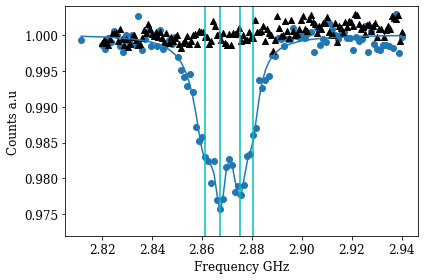

In [32]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
#ax1 = fig.add_subplot(122)

ax.scatter(frequencies, counts+0.003)
ax.scatter(frequencies1, counts1+0.003, color='k', marker='^')
ax.plot(frequencies, four_lorentzian_dip(frequencies, *popt)+0.003)
ax.axvline(x=2.86737703, color='c')
ax.axvline(x=2.87506937, color='c')
ax.axvline(x=2.86113145, color='c')
ax.axvline(x=2.88037488, color='c')
'''
ax.axvline(x=2.86737703, ymin=0.03, ymax=0.9, color='c')
ax.axvline(x=2.87506937, ymin=0.09, ymax=0.9, color='c')
ax.axvline(x=2.86113145, ymin=0.26, ymax=0.9, color='c')
ax.axvline(x=2.88037488, ymin=0.36, ymax=0.9, color='c')
'''
plt.ylim(0.972, 1.004)
ax.set_ylabel('Counts a.u', fontsize=12)
ax.set_xlabel('Frequency GHz', fontsize=12)
#ax1.set_ylabel('Counts a.u', fontsize=12)
#ax1.set_xlabel('Frequency GHz', fontsize=12)


plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/figures/cavity_automation_contrast.pdf')

[ 2.86975053 -0.02243667  0.99849071  0.02494553]


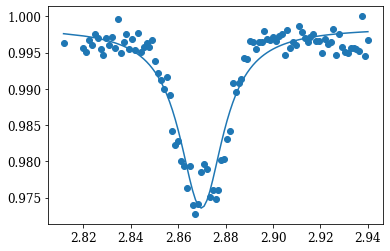

In [13]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 1000, 950000])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))

In [14]:
counts = np.array([8306010.800000001, 8296079.800000001, 8284542.400000001, 8305180.600000001, 8321384.200000001, 8281463.4, 8317885.600000001, 8321447.000000001, 8308257.800000001, 8318558.000000002, 8281627.4, 8289436.200000001, 8323745.4, 8299670.4, 8317346.4, 8336941.800000001, 8341329.4, 8305727.000000001, 8301250.4, 8331216.6, 8285938.4, 8290181.199999999, 8275204.4, 8295976.4, 8301870.800000001, 8295213.0, 8317388.4, 8300969.4, 8283035.4, 8272453.4, 8280177.800000001, 8275736.199999999, 8285413.0, 8253224.4, 8277549.600000001, 8279790.8, 8273873.600000001, 8280894.6, 8249496.4, 8267229.4, 8289775.200000001, 8263894.000000001, 8257889.6, 8250294.0, 8226222.4, 8227222.600000001, 8202901.4, 8246466.6, 8228710.800000001, 8158600.200000001, 8192110.800000001, 8153214.200000001, 8138856.000000001, 8138523.200000001, 8127515.800000001, 8133187.200000001, 8129525.200000001, 8107511.000000001, 8081802.6, 8074366.2, 8087489.2, 8079648.800000001, 8097466.4, 8118121.800000001, 8135723.4, 8137717.200000001, 8126814.200000001, 8120512.200000001, 8117830.0, 8111445.4, 8114563.000000001, 8139668.800000001, 8164538.2, 8157255.600000001, 8159601.4, 8144094.4, 8197632.6, 8232497.200000001, 8240281.0, 8207218.6, 8203642.6000000015, 8240835.4, 8278013.600000001, 8277303.800000001, 8240256.000000001, 8267157.0, 8274102.0, 8323315.0, 8310096.6000000015, 8326091.4, 8305966.400000001, 8317707.800000001, 8341108.2, 8299020.0, 8315601.4, 8313235.200000001, 8299961.600000001, 8302075.200000001, 8326558.0, 8324785.6, 8303452.6, 8355755.600000001, 8321027.800000001, 8325481.400000001, 8339508.600000001, 8343673.600000001, 8310814.0, 8297610.000000001, 8327913.0, 8318691.200000001, 8323407.4, 8346874.2, 8311628.6, 8345444.800000001, 8352543.0, 8328429.6000000015, 8327118.6, 8337243.0, 8371956.0, 8370191.800000001, 8332389.6000000015, 8350667.0, 8358231.000000002, 8366032.4, 8341418.200000001, 8339636.4, 8350173.4, 8364086.000000001, 8371048.000000001, 8378536.0, 8365732.2, 8349017.4, 8338558.800000001, 8333732.4, 8322577.6, 8368315.600000001, 8368236.6, 8380010.400000001, 8374887.4, 8394950.200000001, 8389125.2, 8407205.6, 8365169.0, 8357961.600000001, 8379093.600000001, 8347911.4, 8354723.800000001, 8356507.800000001, 8369449.0, 8364524.6000000015, 8335657.4])
frequencies = np.array([2.811641, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])

[8.35732923e+06 2.86698118e+00 2.64903765e-02 2.44974947e+05
 2.87734056e+00 8.70438824e-03 6.37517296e+04]


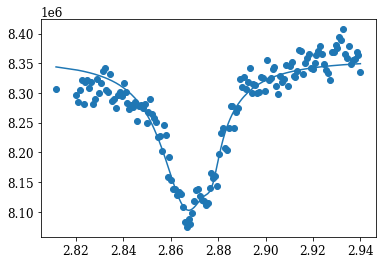

In [15]:
popt, pcov = curve_fit(double_lorentzian_dip, frequencies, counts, p0=[9e5, 2.86, 0.03, 2e5, 2.88, 0.03, 2e5])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, double_lorentzian_dip(frequencies, *popt))

In [16]:
np.max(counts) -np.min(counts)

332839.39999999944

In [17]:
counts = counts/np.max(counts)

[2.86853001 0.02849135 0.9946877  0.03196715]


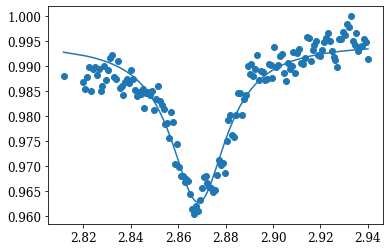

In [18]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 1000, 950000])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))

In [19]:
counts

array([0.98796333, 0.98678208, 0.98540975, 0.98786458, 0.98979192,
       0.98504352, 0.98937578, 0.98979939, 0.9882306 , 0.98945576,
       0.98506303, 0.98599185, 0.99007278, 0.98720916, 0.98931164,
       0.99164243, 0.99216432, 0.98792957, 0.9873971 , 0.99096144,
       0.9855758 , 0.98608046, 0.98429904, 0.98676978, 0.98747089,
       0.98667897, 0.98931664, 0.98736367, 0.9852305 , 0.98397182,
       0.9848906 , 0.9843623 , 0.98551331, 0.98168462, 0.98457799,
       0.98484457, 0.98414075, 0.98497586, 0.98124119, 0.98335045,
       0.98603217, 0.98295372, 0.98223952, 0.98133606, 0.97847285,
       0.97859182, 0.97569892, 0.98088081, 0.97876883, 0.97042948,
       0.97441542, 0.96978884, 0.968081  , 0.96804141, 0.96673213,
       0.96740672, 0.96697114, 0.96435265, 0.96129475, 0.96041022,
       0.96197115, 0.96103856, 0.96315789, 0.96561476, 0.96770839,
       0.96794554, 0.96664868, 0.96589909, 0.96558005, 0.96482063,
       0.96519145, 0.96817768, 0.97113578, 0.97026955, 0.97054

In [20]:
popt, pcov = curve_fit(double_lorentzian_dip, frequencies, counts, p0=[8.28e+06,   2.86e+00,   1.13e-02,   1.97e+05, 2.87e+00, 9.74e-03, 1.96e+05])
print(popt)
plt.scatter(frequencies, counts)
plt.plot(frequencies, double_lorentzian_dip(frequencies, *popt))

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

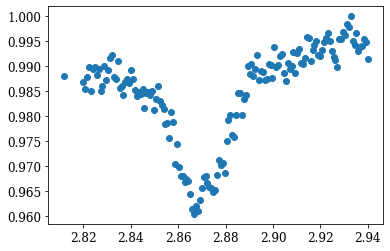

In [21]:
plt.scatter(frequencies, counts)

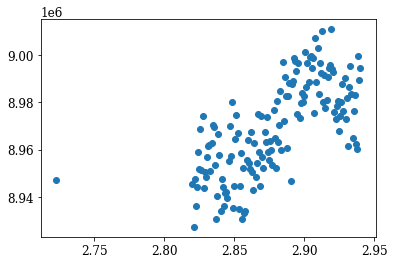

In [22]:
counts = np.array([8947120.600000001, 8945615.6, 8927381.200000001, 8947434.8, 8936336.0, 8944060.8, 8959137.0, 8952016.200000001, 8968891.0, 8951503.600000001, 8974365.2, 8943812.4, 8950451.0, 8948488.600000001, 8957096.600000001, 8961423.4, 8961946.4, 8951054.4, 8962767.200000001, 8970406.8, 8969492.8, 8953356.600000001, 8930776.0, 8940517.2, 8966621.0, 8957541.2, 8933915.2, 8947747.600000001, 8944272.0, 8935998.200000001, 8941756.6, 8942088.200000001, 8939695.200000001, 8955189.8, 8970072.0, 8957134.0, 8980291.600000001, 8935408.4, 8944679.2, 8964360.8, 8974427.200000001, 8966875.200000001, 8935055.6, 8944481.8, 8958624.8, 8930645.8, 8952390.600000001, 8933437.600000001, 8933905.4, 8955655.0, 8964182.600000001, 8954458.4, 8951710.4, 8967301.4, 8950351.0, 8943039.4, 8962745.2, 8948323.8, 8954200.8, 8975109.4, 8959144.4, 8944752.600000001, 8974348.0, 8957060.0, 8952291.200000001, 8967587.8, 8963047.8, 8973799.4, 8958826.600000001, 8955736.6, 8963770.8, 8959704.0, 8953426.8, 8976559.200000001, 8964730.2, 8952161.0, 8980393.600000001, 8963021.2, 8970379.8, 8984872.200000001, 8960014.8, 8997042.8, 8972131.200000001, 8990609.0, 8982824.4, 8960862.6, 8982824.000000002, 8988221.0, 8946933.8, 8987876.0, 8988828.8, 8998596.8, 8997504.8, 8993014.200000001, 8975067.4, 8996480.2, 8973414.2, 8979755.4, 8983819.4, 8980151.400000002, 8982834.200000001, 9001179.4, 8986397.2, 8996744.4, 8988675.8, 8999027.200000001, 8999678.4, 8994410.4, 8998761.600000001, 8975452.4, 9006961.200000001, 8988429.8, 9002786.200000001, 8983387.2, 8996369.600000001, 8992443.6, 9010212.600000001, 8980112.600000001, 8991566.0, 8977728.000000002, 8980986.8, 8990700.0, 8994281.4, 8995723.600000001, 9010810.8, 8994040.600000001, 8992678.0, 8975855.0, 8973105.600000001, 8978302.600000001, 8980688.8, 8968062.2, 8974246.4, 8980018.4, 8987701.0, 8976344.000000002, 8990312.8, 8973016.200000001, 8981853.8, 8961519.6, 8986548.4, 8995170.6, 8983316.4, 8964829.4, 8976513.0, 8983019.8, 8962255.4, 8960421.200000001, 8999400.0, 8989280.2, 8994300.2])
frequencies = np.array([2.722547, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

In [23]:
np.max(counts) -np.min(counts)

83429.59999999963

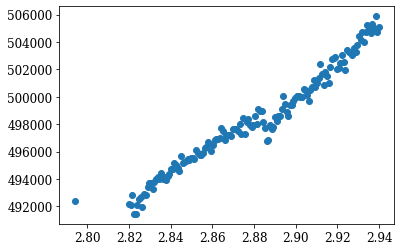

In [24]:
#Background drift in laser illumination
counts = np.array([492366.2, 492150.4, 492070.0, 492816.4, 491469.2, 491448.0, 492098.80000000005, 492511.2, 492702.4, 491940.0, 492920.80000000005, 492838.60000000003, 493440.2, 493710.2, 493731.2, 493259.80000000005, 493741.4, 493978.60000000003, 494111.2, 493986.80000000005, 494406.2, 493985.80000000005, 494133.4, 493909.60000000003, 494203.80000000005, 494358.2, 494736.80000000005, 494717.80000000005, 495132.0, 495008.80000000005, 494823.0, 494544.4, 495651.60000000003, 495148.60000000003, 495255.0, 495343.60000000003, 495421.2, 495419.60000000003, 495514.4, 495563.0, 495453.2, 496128.80000000005, 495863.4, 495763.2, 495713.0, 495921.80000000005, 496283.0, 496297.4, 496716.4, 496556.60000000003, 496068.60000000003, 496473.2, 496855.60000000003, 496917.60000000003, 496927.60000000003, 496965.60000000003, 497714.0, 497535.0, 496832.60000000003, 497219.80000000005, 497232.80000000005, 497205.0, 497099.2, 497658.0, 497615.60000000003, 497637.2, 497519.80000000005, 497982.80000000005, 497286.80000000005, 498416.60000000003, 497251.80000000005, 498124.0, 498377.4, 497936.4, 497812.60000000003, 497903.4, 498614.2, 497993.2, 499079.0, 498941.2, 498924.0, 498163.80000000005, 497723.2, 496742.4, 496845.2, 497913.80000000005, 497633.0, 497778.0, 498487.80000000005, 498228.2, 498580.4, 498609.80000000005, 499106.60000000003, 500022.2, 499449.2, 498860.60000000003, 498605.0, 499416.4, 499403.80000000005, 499717.0, 499941.0, 500037.60000000003, 500082.60000000003, 499964.60000000003, 499981.60000000003, 500540.80000000005, 500527.2, 500160.2, 499725.80000000005, 500518.2, 500729.2, 501231.0, 500743.80000000005, 500970.80000000005, 501390.60000000003, 502388.0, 501640.60000000003, 500829.0, 501805.80000000005, 501535.0, 501016.2, 502202.0, 502744.80000000005, 502832.60000000003, 502871.80000000005, 502003.60000000003, 502130.80000000005, 502480.80000000005, 503038.60000000003, 502515.4, 501932.4, 503395.2, 503252.2, 503196.0, 503064.2, 503582.4, 503274.0, 503775.2, 504417.80000000005, 504160.60000000003, 504733.4, 504025.0, 504742.0, 505213.4, 505079.60000000003, 504664.4, 505281.80000000005, 505000.80000000005, 505877.2, 504708.0, 505120.80000000005])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

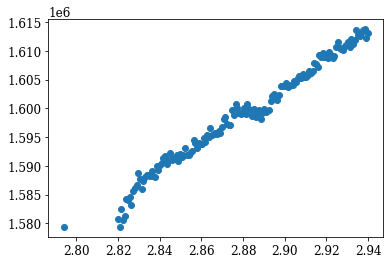

In [25]:
#Drift with microwaves being delivered
counts = np.array([1579421.2, 1580813.0, 1579365.2, 1582479.4, 1580642.6, 1581349.6, 1584274.0, 1583963.4, 1584542.8, 1583144.6, 1585545.8, 1586090.4000000001, 1586582.2000000002, 1588743.8, 1587714.8, 1585999.6, 1587280.4, 1588018.4, 1588379.4000000001, 1588429.6, 1588201.2, 1589107.8, 1588301.0, 1588073.8, 1590007.8, 1589354.6, 1590144.6, 1590476.8000000003, 1591358.4, 1591654.0, 1590280.0, 1590929.2000000002, 1592295.8, 1591026.0, 1591369.0, 1591200.0, 1591806.2000000002, 1590842.0, 1592027.4, 1591543.0, 1591906.0, 1593085.2000000002, 1591920.0, 1591936.6, 1592179.0, 1592600.0, 1594420.6, 1593976.0, 1593034.8, 1594001.4, 1593875.2000000002, 1593735.0, 1594865.0, 1594194.0, 1595304.6, 1595060.8000000003, 1596628.8, 1595420.2000000002, 1595496.8, 1595770.8, 1595615.0, 1596007.4, 1595685.8000000003, 1596712.8, 1598088.0, 1598453.0, 1597239.0, 1597092.2000000002, 1597065.0, 1599669.8000000003, 1598873.4000000001, 1600799.7999999998, 1599985.4000000001, 1599260.0, 1599085.2000000002, 1599275.6, 1600072.2, 1598945.6, 1600840.8, 1599884.0, 1599716.0, 1598603.8, 1599846.6, 1598550.4, 1599254.4, 1599797.4, 1598203.4000000001, 1599115.7999999998, 1599938.0, 1599311.6, 1599588.4000000001, 1599765.6, 1601270.2000000002, 1602112.6, 1602511.2000000002, 1602139.4000000001, 1601373.4000000001, 1602341.8, 1603942.6, 1603948.4, 1603954.7999999998, 1604495.0, 1603727.8000000003, 1603900.6, 1604124.2000000002, 1604105.8, 1604713.4000000001, 1604524.2000000002, 1605245.4, 1605566.8000000003, 1605371.7999999998, 1605943.4, 1605467.0, 1605424.2000000002, 1605797.2000000002, 1606483.6, 1606168.0, 1606427.4, 1607812.6, 1607682.8000000003, 1607284.8, 1609228.2000000002, 1608901.8000000003, 1609582.6, 1608957.2000000002, 1609052.2000000002, 1608711.4, 1609770.4, 1609369.0, 1608782.0, 1609177.2000000002, 1610741.6, 1611479.6, 1610576.2000000002, 1610309.2, 1610178.6, 1610883.6, 1610981.2, 1611476.0, 1610739.4, 1612143.4000000001, 1611136.4, 1611971.8000000003, 1613642.4, 1612777.4000000001, 1612633.2000000002, 1613156.8, 1613585.8, 1613772.2000000002, 1612249.4000000001, 1613095.6])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

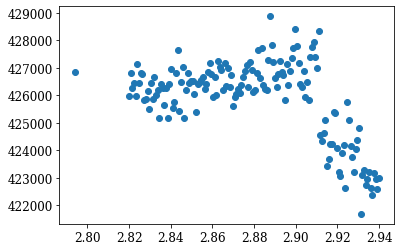

In [26]:
#Laser only, Not sure what drrift at end is, perhaps bumped mirrors
counts = np.array([426836.80000000005, 425969.60000000003, 426802.80000000005, 426279.80000000005, 426453.2, 425982.2, 427147.60000000003, 426462.0, 426801.2, 426778.60000000003, 425848.80000000005, 425882.4, 426146.2, 425514.2, 426456.4, 425850.0, 426677.0, 425999.60000000003, 426186.80000000005, 425171.0, 426400.4, 426256.80000000005, 425640.4, 426252.60000000003, 425176.0, 426420.0, 426966.4, 425550.80000000005, 425757.60000000003, 426806.2, 427642.0, 425433.0, 426500.0, 427016.60000000003, 425182.4, 426207.60000000003, 426803.80000000005, 426464.60000000003, 426524.0, 426535.80000000005, 426056.80000000005, 425389.0, 426414.0, 426470.4, 426542.60000000003, 426678.80000000005, 426229.80000000005, 426413.80000000005, 426845.0, 427190.80000000005, 426783.60000000003, 425935.2, 426683.80000000005, 426012.4, 427251.0, 427041.2, 426938.0, 426197.2, 427172.0, 426335.0, 427009.60000000003, 426288.4, 426752.4, 425625.0, 425943.0, 426032.0, 426240.80000000005, 426095.2, 426364.60000000003, 426666.80000000005, 426883.4, 427093.60000000003, 426315.0, 427219.80000000005, 426928.2, 426110.60000000003, 426206.60000000003, 426800.2, 427639.0, 426629.60000000003, 427705.4, 426361.80000000005, 426227.60000000003, 426184.80000000005, 427289.60000000003, 428877.60000000003, 427832.60000000003, 427221.60000000003, 426647.2, 426298.4, 426766.80000000005, 427248.0, 426845.60000000003, 426731.60000000003, 425844.0, 427147.60000000003, 426373.80000000005, 426890.0, 427348.2, 427708.2, 428431.0, 427809.0, 427165.2, 426415.60000000003, 426315.4, 426882.4, 425951.60000000003, 426500.60000000003, 425837.60000000003, 427387.60000000003, 427757.80000000005, 427941.80000000005, 427411.4, 427002.2, 428347.2, 424574.2, 424356.4, 424640.60000000003, 425113.80000000005, 423445.4, 423686.4, 424223.4, 424217.0, 425406.0, 425362.60000000003, 424075.80000000005, 423207.4, 423050.4, 423888.0, 424209.80000000005, 422632.2, 425771.0, 425116.2, 424164.2, 423752.60000000003, 423204.0, 424044.60000000003, 424359.80000000005, 424830.80000000005, 421688.4, 423117.80000000005, 423290.80000000005, 422728.0, 422943.2, 423216.2, 422636.2, 422391.4, 423172.2, 422949.2, 422604.60000000003, 423010.60000000003])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

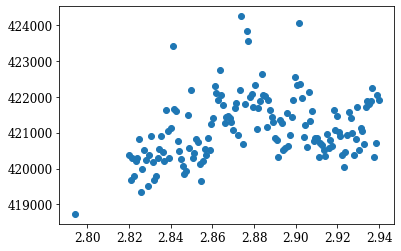

In [27]:
#cavity detuned above transition, 5 second integration time, 1 run
counts = np.array([418736.2, 420378.2, 419673.4, 420298.80000000005, 419781.0, 420207.0, 420281.0, 420826.60000000003, 419344.80000000005, 419978.0, 420515.2, 420241.2, 419521.80000000005, 420370.60000000003, 420903.80000000005, 420169.0, 419667.2, 419780.60000000003, 420296.4, 420556.80000000005, 420905.4, 420447.2, 420199.80000000005, 421629.2, 421058.0, 420293.60000000003, 421121.0, 423401.60000000003, 421646.0, 421593.2, 420769.4, 420495.0, 420275.2, 420059.0, 419847.0, 419923.2, 421478.0, 420581.0, 422180.80000000005, 420285.80000000005, 420445.80000000005, 420832.80000000005, 420728.60000000003, 420114.0, 419646.0, 420209.2, 420548.60000000003, 420368.80000000005, 420841.2, 420503.60000000003, 421248.60000000003, 421406.2, 422291.0, 422117.60000000003, 421900.80000000005, 422731.80000000005, 422046.0, 421771.4, 421273.60000000003, 421437.2, 421470.60000000003, 421421.4, 421284.2, 421061.2, 421690.2, 421818.4, 420932.60000000003, 422187.0, 424243.0, 420675.80000000005, 421812.0, 423833.4, 423558.60000000003, 421982.0, 422073.4, 421706.0, 422314.2, 421103.60000000003, 421693.0, 421891.2, 422641.80000000005, 422047.80000000005, 422009.2, 421154.60000000003, 421914.0, 421627.80000000005, 421446.80000000005, 421284.60000000003, 420839.4, 420785.60000000003, 420311.60000000003, 421362.0, 421262.60000000003, 420518.2, 420575.0, 421554.60000000003, 420619.60000000003, 420939.0, 421446.4, 421905.0, 422562.2, 422323.60000000003, 424062.60000000003, 422344.60000000003, 421951.80000000005, 420866.80000000005, 421226.2, 420611.2, 422119.80000000005, 421322.60000000003, 421613.0, 420779.60000000003, 420841.2, 420847.0, 420318.80000000005, 420712.60000000003, 420666.60000000003, 420511.4, 420353.0, 420948.80000000005, 420580.60000000003, 420794.2, 420622.2, 421643.4, 421085.80000000005, 421457.4, 421026.2, 420915.60000000003, 420387.4, 420051.80000000005, 420454.2, 420937.80000000005, 421566.60000000003, 421421.4, 420978.2, 420367.2, 420819.80000000005, 421711.0, 420511.2, 421120.2, 421055.4, 420680.80000000005, 421713.80000000005, 421875.2, 421794.2, 421881.2, 422248.2, 420318.2, 420700.0, 422059.0, 421921.0])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

In [28]:
#cavity detuned above transition, 5 second integration time, 2 runs
counts = np.array([844717.8, 844575.0, 844898.8, 844673.8, 844269.0, 844995.2000000001, 845669.4, 845677.4000000001, 845688.6000000001, 844767.0, 846224.2000000001, 845008.2, 844276.8, 845075.8, 844056.6000000001, 844437.6000000001, 845316.0, 845473.2000000001, 844930.2000000001, 844335.0, 844436.2000000001, 845138.6000000001, 846107.2000000001, 845762.2000000001, 846760.2000000001, 846215.2000000001, 845664.2000000001, 845368.4, 845821.4, 845226.4000000001, 845894.0, 845096.4, 844677.8, 845760.2000000001, 844499.0, 845260.8, 844745.0, 845131.6000000001, 845454.8, 844448.8, 843920.0, 844503.2000000001, 844790.8, 845366.4, 844468.4, 844841.8, 845510.8, 845659.4000000001, 844483.6000000001, 845914.2000000001, 845908.8, 845889.4, 845248.8, 845204.2, 844451.2000000001, 844805.2, 847150.4000000001, 846559.4, 845443.8, 845608.2000000001, 844874.6000000001, 845778.2, 844581.8, 844334.8, 845587.8, 844320.0, 845714.0, 845577.2, 845696.8, 846296.2, 844836.0, 845539.2, 844918.4000000001, 844923.8, 845802.6000000001, 845223.2000000001, 845198.0, 847250.4, 845826.6000000001, 845832.6000000001, 845997.8, 846560.4, 844750.8, 846265.4, 845746.2, 845516.0, 843578.2000000001, 844944.6000000001, 847746.0, 846300.2, 845349.6000000001, 845519.4000000001, 847167.0, 845946.4000000001, 845095.0, 847297.0, 845956.8, 845453.8, 845610.8, 846248.0, 847252.2, 847743.8, 846167.4, 846014.2000000001, 847361.8, 847805.6000000001, 846996.4, 846766.0, 845762.6000000001, 846599.4, 846251.0, 846888.4, 846934.6000000001, 847663.2, 845799.2000000001, 845450.8, 845507.2000000001, 846936.2, 844713.2000000001, 846538.2000000001, 846361.0, 845748.8, 847081.4000000001, 846454.2, 847185.4, 847057.4, 846535.2000000001, 848032.4, 847895.4, 846796.0, 846149.6000000001, 846392.6000000001, 845615.2, 846687.0, 846850.8, 845933.4, 846597.8, 846926.0, 845318.0, 846184.2, 846187.6000000001, 845255.0, 846065.4000000001, 846543.2, 846220.4000000001, 847752.8, 847562.0, 847448.2, 847831.2000000001, 844743.6000000001, 845803.4000000001])
frequencies = np.array([2.793883, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
print((np.max(counts) -np.min(counts))/np.max(counts))

0.005252393658544123


In [29]:
counts = counts/np.max(counts)

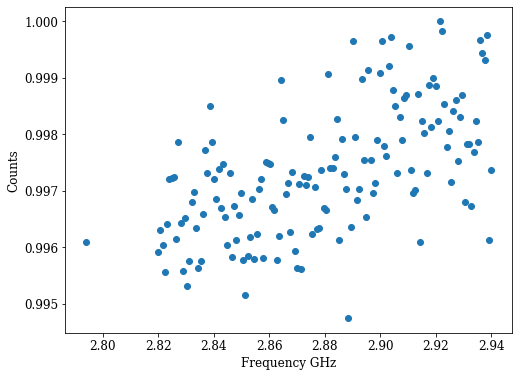

In [30]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(frequencies, counts)

ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Frequency GHz', fontsize=12)

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/cavity_automation_no_contrast.pdf')

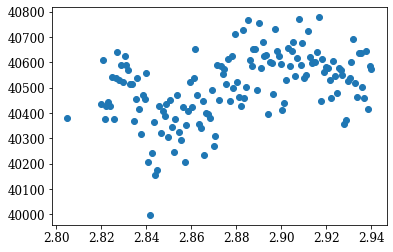

In [31]:
counts = np.array([40379.40000000001, 40437.8, 40610.0, 40374.8, 40428.4, 40442.8, 40426.600000000006, 40542.4, 40376.2, 40540.2, 40639.600000000006, 40531.8, 40587.8, 40524.0, 40625.8, 40589.0, 40569.8, 40513.4, 40514.200000000004, 40367.4, 40454.8, 40537.40000000001, 40415.200000000004, 40316.2, 40471.40000000001, 40455.2, 40558.600000000006, 40207.0, 39998.200000000004, 40244.4, 40364.200000000004, 40156.8, 40176.4, 40426.200000000004, 40320.0, 40407.4, 40390.0, 40437.600000000006, 40307.0, 40451.0, 40344.40000000001, 40247.8, 40378.200000000004, 40469.8, 40323.600000000006, 40294.8, 40425.600000000006, 40205.2, 40354.8, 40407.40000000001, 40524.600000000006, 40422.4, 40539.4, 40653.600000000006, 40472.0, 40358.0, 40339.600000000006, 40448.2, 40234.8, 40401.40000000001, 40397.8, 40382.200000000004, 40490.2, 40272.0, 40309.200000000004, 40588.2, 40452.600000000006, 40584.600000000006, 40555.0, 40575.0, 40515.0, 40613.40000000001, 40447.200000000004, 40623.600000000006, 40497.8, 40710.4, 40520.8, 40463.40000000001, 40429.600000000006, 40727.600000000006, 40459.0, 40504.0, 40765.600000000006, 40609.8, 40586.40000000001, 40654.600000000006, 40654.200000000004, 40491.8, 40754.8, 40579.600000000006, 40682.2, 40626.2, 40627.8, 40398.0, 40601.2, 40597.8, 40473.8, 40732.4, 40643.4, 40625.0, 40593.4, 40413.600000000006, 40440.8, 40529.2, 40655.40000000001, 40587.0, 40643.600000000006, 40679.200000000004, 40546.8, 40616.0, 40771.8, 40591.200000000004, 40675.2, 40537.0, 40551.2, 40723.40000000001, 40619.8, 40597.4, 40601.0, 40602.8, 40640.0, 40778.2, 40448.40000000001, 40614.200000000004, 40561.600000000006, 40583.600000000006, 40579.4, 40531.200000000004, 40457.8, 40603.600000000006, 40544.8, 40478.600000000006, 40578.600000000006, 40571.600000000006, 40550.200000000004, 40357.0, 40374.40000000001, 40526.8, 40539.2, 40601.8, 40692.40000000001, 40518.0, 40462.8, 40635.8, 40636.8, 40504.8, 40458.200000000004, 40643.8, 40417.4, 40585.0, 40572.8])
frequencies = np.array([2.804917, 2.82, 2.82080537, 2.82161074, 2.82241611, 2.82322148, 2.82402685, 2.82483221, 2.82563758, 2.82644295, 2.82724832, 2.82805369, 2.82885906, 2.82966443, 2.8304698, 2.83127517, 2.83208054, 2.83288591, 2.83369128, 2.83449664, 2.83530201, 2.83610738, 2.83691275, 2.83771812, 2.83852349, 2.83932886, 2.84013423, 2.8409396, 2.84174497, 2.84255034, 2.8433557, 2.84416107, 2.84496644, 2.84577181, 2.84657718, 2.84738255, 2.84818792, 2.84899329, 2.84979866, 2.85060403, 2.8514094, 2.85221477, 2.85302013, 2.8538255, 2.85463087, 2.85543624, 2.85624161, 2.85704698, 2.85785235, 2.85865772, 2.85946309, 2.86026846, 2.86107383, 2.86187919, 2.86268456, 2.86348993, 2.8642953, 2.86510067, 2.86590604, 2.86671141, 2.86751678, 2.86832215, 2.86912752, 2.86993289, 2.87073826, 2.87154362, 2.87234899, 2.87315436, 2.87395973, 2.8747651, 2.87557047, 2.87637584, 2.87718121, 2.87798658, 2.87879195, 2.87959732, 2.88040268, 2.88120805, 2.88201342, 2.88281879, 2.88362416, 2.88442953, 2.8852349, 2.88604027, 2.88684564, 2.88765101, 2.88845638, 2.88926174, 2.89006711, 2.89087248, 2.89167785, 2.89248322, 2.89328859, 2.89409396, 2.89489933, 2.8957047, 2.89651007, 2.89731544, 2.89812081, 2.89892617, 2.89973154, 2.90053691, 2.90134228, 2.90214765, 2.90295302, 2.90375839, 2.90456376, 2.90536913, 2.9061745, 2.90697987, 2.90778523, 2.9085906, 2.90939597, 2.91020134, 2.91100671, 2.91181208, 2.91261745, 2.91342282, 2.91422819, 2.91503356, 2.91583893, 2.9166443, 2.91744966, 2.91825503, 2.9190604, 2.91986577, 2.92067114, 2.92147651, 2.92228188, 2.92308725, 2.92389262, 2.92469799, 2.92550336, 2.92630872, 2.92711409, 2.92791946, 2.92872483, 2.9295302, 2.93033557, 2.93114094, 2.93194631, 2.93275168, 2.93355705, 2.93436242, 2.93516779, 2.93597315, 2.93677852, 2.93758389, 2.93838926, 2.93919463, 2.94])
plt.scatter(frequencies, counts)

In [32]:
counts = np.array([35893.0, 36301.0, 36304.0, 35989.0, 36283.0, 35914.0, 35855.0, 36293.0, 35834.0, 35784.0, 35698.0, 36269.0, 36039.0, 35870.0, 36235.0, 36190.0, 35946.0, 35945.0, 36264.0, 35972.0, 36158.0, 35851.0, 36167.0, 36168.0, 36115.0, 35959.0, 36276.0, 36432.0, 36301.0, 36408.0, 36322.0, 35802.0, 35760.0, 36254.0, 36282.0, 36089.0, 36253.0, 36321.0, 36104.0, 35999.0, 36192.0, 36026.0, 36254.0, 36060.0, 35870.0, 35587.0, 35523.0, 35128.0, 34989.0, 34960.0, 35275.0, 34995.0, 35031.0, 35072.0, 35234.0, 35865.0, 35629.0, 35815.0, 35733.0, 36128.0, 36216.0, 36162.0, 35885.0, 36155.0, 36065.0, 35874.0, 35909.0, 35746.0, 36568.0, 36123.0, 36208.0, 36316.0, 36443.0, 35881.0, 36139.0, 36167.0, 36262.0, 36201.0, 36336.0, 36487.0, 35947.0, 36208.0, 36340.0, 36208.0, 36401.0, 36089.0, 35650.0, 36119.0, 36129.0, 36321.0, 36401.0, 36518.0, 36265.0, 36490.0, 36203.0, 36390.0, 36215.0, 36415.0, 36094.0, 36197.0, 36088.0])
frequencies = np.array([2.81805, 2.82, 2.8210101, 2.8220202, 2.8230303, 2.8240404, 2.82505051, 2.82606061, 2.82707071, 2.82808081, 2.82909091, 2.83010101, 2.83111111, 2.83212121, 2.83313131, 2.83414141, 2.83515152, 2.83616162, 2.83717172, 2.83818182, 2.83919192, 2.84020202, 2.84121212, 2.84222222, 2.84323232, 2.84424242, 2.84525253, 2.84626263, 2.84727273, 2.84828283, 2.84929293, 2.85030303, 2.85131313, 2.85232323, 2.85333333, 2.85434343, 2.85535354, 2.85636364, 2.85737374, 2.85838384, 2.85939394, 2.86040404, 2.86141414, 2.86242424, 2.86343434, 2.86444444, 2.86545455, 2.86646465, 2.86747475, 2.86848485, 2.86949495, 2.87050505, 2.87151515, 2.87252525, 2.87353535, 2.87454545, 2.87555556, 2.87656566, 2.87757576, 2.87858586, 2.87959596, 2.88060606, 2.88161616, 2.88262626, 2.88363636, 2.88464646, 2.88565657, 2.88666667, 2.88767677, 2.88868687, 2.88969697, 2.89070707, 2.89171717, 2.89272727, 2.89373737, 2.89474747, 2.89575758, 2.89676768, 2.89777778, 2.89878788, 2.89979798, 2.90080808, 2.90181818, 2.90282828, 2.90383838, 2.90484848, 2.90585859, 2.90686869, 2.90787879, 2.90888889, 2.90989899, 2.91090909, 2.91191919, 2.91292929, 2.91393939, 2.91494949, 2.9159596, 2.9169697, 2.9179798, 2.9189899, 2.92])

centre      = 2.869810658308956
FWHM        = 0.008556698032913923
height      = 36191.544908615266
amplitude   = 1289.958590390059
Contrast    =  0.03564254009181545


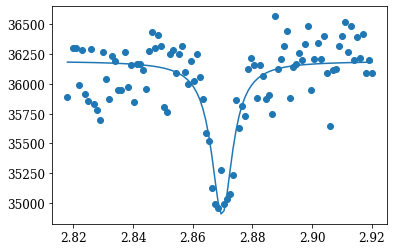

In [33]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 3000, 133000])
plt.scatter(frequencies, counts)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt))
names = ['centre', 'FWHM', 'height', 'amplitude']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)
    
print('Contrast    = ', popt[3]/popt[2])

In [34]:
'''
counts = [0] * len(frequencies)
number_of_runs = 2
integration_time = 2
counter_frequency = 1/integration_time
sleep_time = 4.5
'''


counts0= np.array([19035.600000000002, 19110.8, 18991.600000000002, 18905.2, 18993.2, 19077.2, 18991.600000000002, 18995.600000000002, 19065.2, 19034.2, 19154.2, 19096.2, 19106.2, 19000.2, 19152.600000000002, 19066.4, 18902.600000000002, 18947.8, 19102.4, 19050.0, 18935.2, 19067.2, 19029.4, 19060.0, 19092.4, 19094.600000000002, 19106.600000000002, 18981.8, 18992.600000000002, 19046.0, 18997.4, 19125.4, 19070.2, 18998.4, 18917.4, 18952.600000000002, 19071.4, 18993.8, 19074.600000000002, 18872.600000000002, 18971.2, 19017.8, 18979.8, 19104.2, 18990.4, 18962.0, 19105.2, 19057.2, 19085.8, 18963.4, 19006.2, 18976.2, 18994.600000000002, 19118.4, 19029.0, 19108.8, 18935.2, 19052.0, 19090.2, 18957.600000000002, 18981.0, 18937.2, 18988.4, 18969.8, 18971.600000000002, 19043.8, 18894.0, 18905.600000000002, 18912.4, 18864.8, 18870.600000000002, 18779.8, 18761.4, 18793.2, 18836.4, 18845.0, 18831.4, 18731.4, 18770.2, 18921.600000000002, 18995.600000000002, 18921.4, 19040.600000000002, 19009.2, 18969.8, 19107.8, 19020.4, 18990.0, 18993.0, 19029.0, 19113.8, 19102.600000000002, 19026.2, 19012.2, 19026.4, 18986.4, 18927.8, 18954.0, 19039.0, 19026.2, 19024.0, 19003.0, 19060.2, 19128.4, 19094.4, 19161.8, 19005.0, 19128.4, 19112.0, 19009.0, 19014.2, 19089.0, 18991.2, 18996.8, 19063.600000000002, 19067.600000000002, 19006.2, 18994.4, 19049.0, 18988.4, 18949.4, 19148.8, 19076.600000000002, 18941.2, 19038.2, 18931.0, 19076.4, 19065.0, 19090.600000000002, 19019.2, 19065.2, 18924.8, 19046.600000000002, 19065.8, 19071.4, 19055.8, 19044.0, 18950.600000000002, 18948.2, 19004.600000000002, 19023.600000000002, 19045.2, 19087.8, 18933.0, 18981.4, 18948.4, 19066.4, 19021.2, 18982.4, 19036.4, 19048.600000000002])
counts1= np.array([248760.0, 248829.0, 249211.0, 249019.5, 248829.0, 248956.0, 248655.5, 249102.5, 249206.0, 248707.5, 248381.0, 248952.5, 248958.5, 248728.0, 249391.5, 249358.5, 248951.5, 249155.5, 249269.5, 249491.5, 248878.5, 248710.5, 248793.5, 249499.0, 249424.0, 249828.0, 249095.0, 249254.5, 249460.5, 248838.5, 248925.5, 248507.0, 248918.0, 249192.5, 248308.5, 248903.5, 248163.0, 249366.5, 249290.5, 248403.5, 248999.5, 249097.5, 249639.5, 248200.5, 249280.0, 249542.0, 248757.0, 249185.0, 248817.5, 249018.0, 248178.0, 249042.0, 248990.5, 249534.0, 249321.5, 249568.5, 248404.5, 248972.5, 248568.0, 249715.0, 248736.0, 249123.5, 249270.0, 248607.0, 248924.5, 248066.5, 247708.0, 247178.0, 247163.5, 246997.5, 245255.0, 245011.5, 245913.0, 244933.5, 245093.0, 245112.5, 245335.5, 245022.0, 244378.0, 246038.0, 246916.0, 248192.0, 247002.0, 247446.0, 247150.0, 247898.0, 248694.0, 248412.0, 247784.5, 248251.0, 248858.5, 247874.0, 248174.5, 248299.0, 248206.5, 248347.0, 248338.0, 249094.0, 249266.5, 249600.0, 249225.0, 249108.0, 248655.0, 248911.5, 248539.5, 249188.5, 249745.0, 248747.0, 249278.0, 249511.5, 248519.0, 249316.5, 248760.0, 249363.5, 249230.5, 249733.5, 249493.5, 248831.5, 249539.0, 249131.5, 249271.5, 248744.5, 249248.0, 248582.5, 249130.0, 249615.5, 248949.5, 249105.5, 248848.5, 249470.0, 249385.5, 249750.0, 249005.0, 249482.5, 249220.0, 249191.5, 249402.5, 249652.0, 249336.0, 249827.5, 249926.0, 249334.5, 249107.5, 249159.0, 248741.0, 248872.5, 249709.0, 249955.5, 249094.0, 249653.5, 249234.0])
counts = (counts0 + counts1)/2.0
counts = counts/np.max(counts)

frequencies = np.array([2.820676, 2.821, 2.82166443, 2.82232886, 2.82299329, 2.82365772, 2.82432215, 2.82498658, 2.82565101, 2.82631544, 2.82697987, 2.8276443, 2.82830872, 2.82897315, 2.82963758, 2.83030201, 2.83096644, 2.83163087, 2.8322953, 2.83295973, 2.83362416, 2.83428859, 2.83495302, 2.83561745, 2.83628188, 2.83694631, 2.83761074, 2.83827517, 2.8389396, 2.83960403, 2.84026846, 2.84093289, 2.84159732, 2.84226174, 2.84292617, 2.8435906, 2.84425503, 2.84491946, 2.84558389, 2.84624832, 2.84691275, 2.84757718, 2.84824161, 2.84890604, 2.84957047, 2.8502349, 2.85089933, 2.85156376, 2.85222819, 2.85289262, 2.85355705, 2.85422148, 2.85488591, 2.85555034, 2.85621477, 2.85687919, 2.85754362, 2.85820805, 2.85887248, 2.85953691, 2.86020134, 2.86086577, 2.8615302, 2.86219463, 2.86285906, 2.86352349, 2.86418792, 2.86485235, 2.86551678, 2.86618121, 2.86684564, 2.86751007, 2.8681745, 2.86883893, 2.86950336, 2.87016779, 2.87083221, 2.87149664, 2.87216107, 2.8728255, 2.87348993, 2.87415436, 2.87481879, 2.87548322, 2.87614765, 2.87681208, 2.87747651, 2.87814094, 2.87880537, 2.8794698, 2.88013423, 2.88079866, 2.88146309, 2.88212752, 2.88279195, 2.88345638, 2.88412081, 2.88478523, 2.88544966, 2.88611409, 2.88677852, 2.88744295, 2.88810738, 2.88877181, 2.88943624, 2.89010067, 2.8907651, 2.89142953, 2.89209396, 2.89275839, 2.89342282, 2.89408725, 2.89475168, 2.89541611, 2.89608054, 2.89674497, 2.8974094, 2.89807383, 2.89873826, 2.89940268, 2.90006711, 2.90073154, 2.90139597, 2.9020604, 2.90272483, 2.90338926, 2.90405369, 2.90471812, 2.90538255, 2.90604698, 2.90671141, 2.90737584, 2.90804027, 2.9087047, 2.90936913, 2.91003356, 2.91069799, 2.91136242, 2.91202685, 2.91269128, 2.9133557, 2.91402013, 2.91468456, 2.91534899, 2.91601342, 2.91667785, 2.91734228, 2.91800671, 2.91867114, 2.91933557, 2.92])

centre      = 2.8699968248524796
FWHM        = -0.008173467702488089
height      = 0.9973363050905764
amplitude   = 0.017844652136101733
Contrast    =  0.017892311795950428


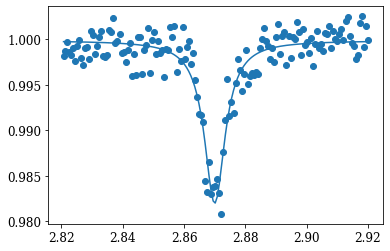

In [39]:
popt, pcov = curve_fit(lorentzian_dip, frequencies, counts, p0=[2.87,  0.001, 3000, 133000])
plt.scatter(frequencies, counts+ 0.0025)
plt.plot(frequencies, lorentzian_dip(frequencies, *popt)+0.0025)
names = ['centre', 'FWHM', 'height', 'amplitude']
for x, y in zip(names, popt):
    print('{:<11}'.format(x),'=', y)
    
print('Contrast    = ', popt[3]/popt[2])

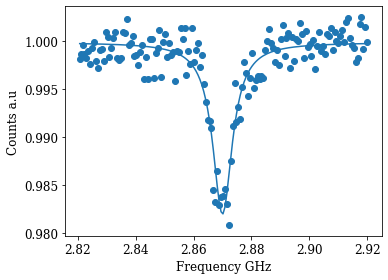

In [40]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')


fig = plt.figure(figsize=(5.5,4))
ax = fig.add_subplot(111)


ax.scatter(frequencies, counts+ 0.0025)
ax.plot(frequencies, lorentzian_dip(frequencies, *popt)+ 0.0025)

ax.set_ylabel('Counts a.u', fontsize=12)
ax.set_xlabel('Frequency GHz', fontsize=12)
plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/free_space_ODMR.pdf')

In [430]:
df = pd.read_csv (r'C:\Users\qmapp-lab\Lyra\Q data\TRACE4.csv', skiprows=17, header = None)

In [431]:
df = df.drop(df.index[-1])

In [432]:
all_frequencies = df[0].values
all_trace = df[1].values

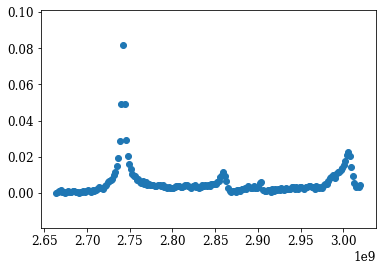

In [433]:
plt.scatter(all_frequencies, all_trace)

In [437]:
frequencies = all_frequencies[30:70]
trace = all_trace[30:70]

In [438]:
frequencies = frequencies.astype(np.float)
trace = trace.astype(np.float)

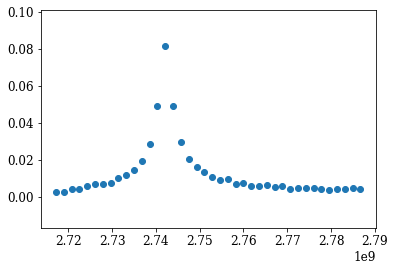

In [439]:
plt.scatter(frequencies, trace)

In [440]:
frequencies

array([  2.71720100e+09,   2.71898288e+09,   2.72076476e+09,
         2.72254664e+09,   2.72432852e+09,   2.72611040e+09,
         2.72789228e+09,   2.72967416e+09,   2.73145604e+09,
         2.73323793e+09,   2.73501981e+09,   2.73680169e+09,
         2.73858357e+09,   2.74036545e+09,   2.74214733e+09,
         2.74392921e+09,   2.74571109e+09,   2.74749297e+09,
         2.74927485e+09,   2.75105673e+09,   2.75283861e+09,
         2.75462049e+09,   2.75640237e+09,   2.75818425e+09,
         2.75996614e+09,   2.76174802e+09,   2.76352990e+09,
         2.76531178e+09,   2.76709366e+09,   2.76887554e+09,
         2.77065742e+09,   2.77243930e+09,   2.77422118e+09,
         2.77600306e+09,   2.77778494e+09,   2.77956682e+09,
         2.78134870e+09,   2.78313058e+09,   2.78491246e+09,
         2.78669435e+09])

In [441]:
trace

array([ 0.00252917,  0.00238362,  0.00408641,  0.0042307 ,  0.00599324,
        0.00679695,  0.00703337,  0.00766315,  0.01019539,  0.01175023,
        0.01466965,  0.01962134,  0.02865628,  0.04922595,  0.08172939,
        0.04923817,  0.02954552,  0.02026868,  0.01595165,  0.01325913,
        0.01056916,  0.0092217 ,  0.00952587,  0.00694815,  0.00769025,
        0.00610238,  0.00572714,  0.00656066,  0.00512137,  0.00582593,
        0.0044309 ,  0.00477932,  0.00454497,  0.00470653,  0.00438114,
        0.00385186,  0.00411727,  0.00444951,  0.00466622,  0.00404375])

[  2.74292227e+09   1.11966740e+01   8.91582367e-03   1.44649532e+09]


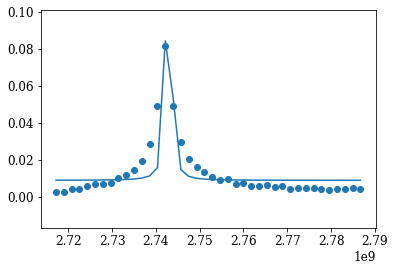

In [445]:
popt, pcov = curve_fit(lorentzian, frequencies, trace, p0=[ 2743000000, 10, 0, 10000000000])
print(popt)
p1=[ 2720000000, 10, 0, 10000000000]
plt.scatter(frequencies, trace)
plt.plot(frequencies, lorentzian(frequencies, *popt))

In [341]:
xdata = np.arange(2.6,2.8,0.00001)

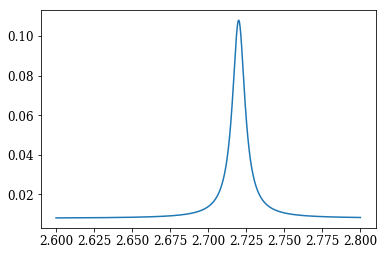

In [342]:
p0=[ 2.72, 0.01, 0.00798432, 0.1]
plt.plot(xdata, lorentzian(xdata, *p0))

In [3]:
frequencies = np.array([2.687314, 2.689008, 2.692395, 2.694089, 2.697476, 2.700864, 2.702557, 2.705945, 2.709332, 2.712719, 2.716107, 2.719494, 2.722881, 2.726269, 2.729656, 2.733034, 2.736431, 2.741512, 2.744899, 2.748287, 2.753368, 2.756755, 2.760142, 2.765223, 2.768611, 2.771998, 2.785547, 2.788935, 2.790628, 2.797403, 2.804178, 2.809259, 2.816034, 2.822808, 2.827889, 2.834664, 2.839745, 2.84652, 2.854988, 2.861763, 2.871925, 2.8787, 2.885474, 2.893943, 2.902411, 2.910879, 2.919348, 2.927816, 2.939672, 2.949834, 2.958302, 2.965007, 2.983708])
step_position = np.array([-5000, -4950, -4900, -4850, -4800, -4750, -4700, -4650, -4600, -4550, -4500, -4450, -4400, -4350, -4300, -4250, -4200, -4150, -4100, -4050, -4000, -3950, -3900, -3850, -3800, -3750, -3700, -3650, -3600, -3550, -3500, -3450, -3400, -3350, -3300, -3250, -3200, -3150, -3100, -3050, -3000, -2950, -2900, -2850, -2800, -2750, -2700, -2650, -2600, -2550, -2500, -2450, -2400])

In [4]:
set_position = np.array([2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95])
actual_position = np.array([0.000609999999999999, 0.00236199999999975, 0.00118799999999997, 0.000344000000000122, 0.000182000000000127, 0.000020000000000131, 0.00155099999999964, 0.00138900000000008, 0.00160000000000027, 0.00115899999999991, 0.00310499999999969, 0.00219000000000014, 0.00366100000000014, 0.00322099999999992, 0.000868000000000091, 0.00233900000000009, 0.00189900000000032, 0.00145799999999996, 0.00101700000000005, 0.000576999999999828, 0.001776, 0.00221600000000022, 0.000744999999999774, 0.00309800000000005, 0.00162700000000005, 0.00206700000000026])

In [5]:
def poly3(frequencies, x3, x2, x1, c):
    return x3*frequencies**3 + x2*frequencies**2 + x1*frequencies + c

In [6]:
param = np.polyfit(frequencies, step_position, 3)
param

array([   69278.67819537,  -609102.9328565 ,  1790504.24225417,
       -1762367.84797146])

In [7]:
fit = poly3(frequencies, 69278.67819537, -609102.9328565, 1790504.24225417, -1762367.84797146)

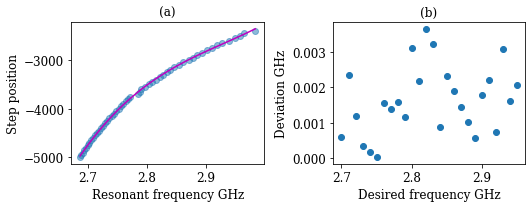

In [9]:
plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(7.5,3))

ax = fig.add_subplot(121)
ax.scatter(frequencies, step_position, alpha=0.5)
ax.plot(frequencies, fit, color='m')
ax.set_ylabel('Step position', fontsize=12)
ax.set_xlabel('Resonant frequency GHz', fontsize=12)
plt.title('(a)')


ax1 = fig.add_subplot(122)
ax1.scatter(set_position, actual_position)
ax1.set_ylabel('Deviation GHz', fontsize=12)
ax1.set_xlabel('Desired frequency GHz', fontsize=12)
plt.title('(b)')


plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/cavity_calibration_python.pdf')

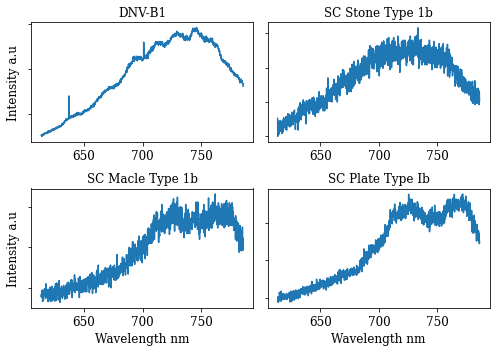

In [3]:
wavelength = np.array([613.376,613.506,613.635,613.765,613.895,614.025,614.155,614.285,614.414,614.544,614.674,614.804,614.934,615.064,615.193,615.323,615.453,615.583,615.713,615.842,615.972,616.102,616.232,616.362,616.492,616.621,616.751,616.881,617.011,617.141,617.270,617.400,617.530,617.660,617.790,617.919,618.049,618.179,618.309,618.438,618.568,618.698,618.828,618.958,619.087,619.217,619.347,619.477,619.607,619.736,619.866,619.996,620.126,620.255,620.385,620.515,620.645,620.774,620.904,621.034,621.164,621.293,621.423,621.553,621.683,621.812,621.942,622.072,622.202,622.331,622.461,622.591,622.721,622.850,622.980,623.110,623.240,623.369,623.499,623.629,623.759,623.888,624.018,624.148,624.277,624.407,624.537,624.667,624.796,624.926,625.056,625.186,625.315,625.445,625.575,625.704,625.834,625.964,626.094,626.223,626.353,626.483,626.612,626.742,626.872,627.001,627.131,627.261,627.390,627.520,627.650,627.780,627.909,628.039,628.169,628.298,628.428,628.558,628.687,628.817,628.947,629.076,629.206,629.336,629.465,629.595,629.725,629.854,629.984,630.114,630.243,630.373,630.503,630.632,630.762,630.892,631.021,631.151,631.281,631.410,631.540,631.670,631.799,631.929,632.059,632.188,632.318,632.447,632.577,632.707,632.836,632.966,633.096,633.225,633.355,633.485,633.614,633.744,633.873,634.003,634.133,634.262,634.392,634.522,634.651,634.781,634.910,635.040,635.170,635.299,635.429,635.558,635.688,635.818,635.947,636.077,636.206,636.336,636.466,636.595,636.725,636.854,636.984,637.114,637.243,637.373,637.502,637.632,637.762,637.891,638.021,638.150,638.280,638.409,638.539,638.669,638.798,638.928,639.057,639.187,639.317,639.446,639.576,639.705,639.835,639.964,640.094,640.223,640.353,640.483,640.612,640.742,640.871,641.001,641.130,641.260,641.389,641.519,641.649,641.778,641.908,642.037,642.167,642.296,642.426,642.555,642.685,642.814,642.944,643.073,643.203,643.332,643.462,643.592,643.721,643.851,643.980,644.110,644.239,644.369,644.498,644.628,644.757,644.887,645.016,645.146,645.275,645.405,645.534,645.664,645.793,645.923,646.052,646.182,646.311,646.441,646.570,646.700,646.829,646.959,647.088,647.218,647.347,647.477,647.606,647.736,647.865,647.995,648.124,648.254,648.383,648.512,648.642,648.771,648.901,649.030,649.160,649.289,649.419,649.548,649.678,649.807,649.937,650.066,650.195,650.325,650.454,650.584,650.713,650.843,650.972,651.102,651.231,651.361,651.490,651.619,651.749,651.878,652.008,652.137,652.267,652.396,652.525,652.655,652.784,652.914,653.043,653.173,653.302,653.431,653.561,653.690,653.820,653.949,654.079,654.208,654.337,654.467,654.596,654.726,654.855,654.984,655.114,655.243,655.373,655.502,655.631,655.761,655.890,656.020,656.149,656.278,656.408,656.537,656.667,656.796,656.925,657.055,657.184,657.313,657.443,657.572,657.702,657.831,657.960,658.090,658.219,658.348,658.478,658.607,658.737,658.866,658.995,659.125,659.254,659.383,659.513,659.642,659.771,659.901,660.030,660.160,660.289,660.418,660.548,660.677,660.806,660.936,661.065,661.194,661.324,661.453,661.582,661.712,661.841,661.970,662.100,662.229,662.358,662.488,662.617,662.746,662.876,663.005,663.134,663.264,663.393,663.522,663.652,663.781,663.910,664.039,664.169,664.298,664.427,664.557,664.686,664.815,664.945,665.074,665.203,665.332,665.462,665.591,665.720,665.850,665.979,666.108,666.238,666.367,666.496,666.625,666.755,666.884,667.013,667.143,667.272,667.401,667.530,667.660,667.789,667.918,668.047,668.177,668.306,668.435,668.564,668.694,668.823,668.952,669.082,669.211,669.340,669.469,669.599,669.728,669.857,669.986,670.116,670.245,670.374,670.503,670.633,670.762,670.891,671.020,671.149,671.279,671.408,671.537,671.666,671.796,671.925,672.054,672.183,672.313,672.442,672.571,672.700,672.829,672.959,673.088,673.217,673.346,673.476,673.605,673.734,673.863,673.992,674.122,674.251,674.380,674.509,674.638,674.768,674.897,675.026,675.155,675.284,675.414,675.543,675.672,675.801,675.930,676.059,676.189,676.318,676.447,676.576,676.705,676.835,676.964,677.093,677.222,677.351,677.480,677.610,677.739,677.868,677.997,678.126,678.255,678.385,678.514,678.643,678.772,678.901,679.030,679.160,679.289,679.418,679.547,679.676,679.805,679.934,680.064,680.193,680.322,680.451,680.580,680.709,680.838,680.968,681.097,681.226,681.355,681.484,681.613,681.742,681.871,682.001,682.130,682.259,682.388,682.517,682.646,682.775,682.904,683.033,683.163,683.292,683.421,683.550,683.679,683.808,683.937,684.066,684.195,684.325,684.454,684.583,684.712,684.841,684.970,685.099,685.228,685.357,685.486,685.615,685.745,685.874,686.003,686.132,686.261,686.390,686.519,686.648,686.777,686.906,687.035,687.164,687.293,687.422,687.552,687.681,687.810,687.939,688.068,688.197,688.326,688.455,688.584,688.713,688.842,688.971,689.100,689.229,689.358,689.487,689.616,689.745,689.875,690.004,690.133,690.262,690.391,690.520,690.649,690.778,690.907,691.036,691.165,691.294,691.423,691.552,691.681,691.810,691.939,692.068,692.197,692.326,692.455,692.584,692.713,692.842,692.971,693.100,693.229,693.358,693.487,693.616,693.745,693.874,694.003,694.132,694.261,694.390,694.519,694.648,694.777,694.906,695.035,695.164,695.293,695.422,695.551,695.680,695.809,695.938,696.067,696.196,696.325,696.454,696.583,696.712,696.841,696.970,697.099,697.228,697.357,697.486,697.614,697.743,697.872,698.001,698.130,698.259,698.388,698.517,698.646,698.775,698.904,699.033,699.162,699.291,699.420,699.549,699.678,699.807,699.936,700.064,700.193,700.322,700.451,700.580,700.709,700.838,700.967,701.096,701.225,701.354,701.483,701.612,701.740,701.869,701.998,702.127,702.256,702.385,702.514,702.643,702.772,702.901,703.030,703.158,703.287,703.416,703.545,703.674,703.803,703.932,704.061,704.190,704.319,704.447,704.576,704.705,704.834,704.963,705.092,705.221,705.350,705.478,705.607,705.736,705.865,705.994,706.123,706.252,706.381,706.509,706.638,706.767,706.896,707.025,707.154,707.283,707.411,707.540,707.669,707.798,707.927,708.056,708.185,708.313,708.442,708.571,708.700,708.829,708.958,709.087,709.215,709.344,709.473,709.602,709.731,709.860,709.988,710.117,710.246,710.375,710.504,710.632,710.761,710.890,711.019,711.148,711.277,711.405,711.534,711.663,711.792,711.921,712.049,712.178,712.307,712.436,712.565,712.693,712.822,712.951,713.080,713.209,713.337,713.466,713.595,713.724,713.853,713.981,714.110,714.239,714.368,714.497,714.625,714.754,714.883,715.012,715.140,715.269,715.398,715.527,715.656,715.784,715.913,716.042,716.171,716.299,716.428,716.557,716.686,716.814,716.943,717.072,717.201,717.329,717.458,717.587,717.716,717.844,717.973,718.102,718.231,718.359,718.488,718.617,718.746,718.874,719.003,719.132,719.261,719.389,719.518,719.647,719.775,719.904,720.033,720.162,720.290,720.419,720.548,720.677,720.805,720.934,721.063,721.191,721.320,721.449,721.578,721.706,721.835,721.964,722.092,722.221,722.350,722.478,722.607,722.736,722.865,722.993,723.122,723.251,723.379,723.508,723.637,723.765,723.894,724.023,724.151,724.280,724.409,724.537,724.666,724.795,724.923,725.052,725.181,725.309,725.438,725.567,725.695,725.824,725.953,726.081,726.210,726.339,726.467,726.596,726.725,726.853,726.982,727.111,727.239,727.368,727.497,727.625,727.754,727.883,728.011,728.140,728.269,728.397,728.526,728.654,728.783,728.912,729.040,729.169,729.298,729.426,729.555,729.683,729.812,729.941,730.069,730.198,730.327,730.455,730.584,730.712,730.841,730.970,731.098,731.227,731.355,731.484,731.613,731.741,731.870,731.998,732.127,732.256,732.384,732.513,732.641,732.770,732.899,733.027,733.156,733.284,733.413,733.542,733.670,733.799,733.927,734.056,734.184,734.313,734.442,734.570,734.699,734.827,734.956,735.084,735.213,735.342,735.470,735.599,735.727,735.856,735.984,736.113,736.241,736.370,736.499,736.627,736.756,736.884,737.013,737.141,737.270,737.398,737.527,737.655,737.784,737.913,738.041,738.170,738.298,738.427,738.555,738.684,738.812,738.941,739.069,739.198,739.326,739.455,739.583,739.712,739.840,739.969,740.097,740.226,740.354,740.483,740.612,740.740,740.869,740.997,741.126,741.254,741.383,741.511,741.640,741.768,741.897,742.025,742.153,742.282,742.410,742.539,742.667,742.796,742.924,743.053,743.181,743.310,743.438,743.567,743.695,743.824,743.952,744.081,744.209,744.338,744.466,744.595,744.723,744.852,744.980,745.108,745.237,745.365,745.494,745.622,745.751,745.879,746.008,746.136,746.265,746.393,746.521,746.650,746.778,746.907,747.035,747.164,747.292,747.421,747.549,747.677,747.806,747.934,748.063,748.191,748.320,748.448,748.576,748.705,748.833,748.962,749.090,749.219,749.347,749.475,749.604,749.732,749.861,749.989,750.117,750.246,750.374,750.503,750.631,750.759,750.888,751.016,751.145,751.273,751.401,751.530,751.658,751.787,751.915,752.043,752.172,752.300,752.429,752.557,752.685,752.814,752.942,753.070,753.199,753.327,753.456,753.584,753.712,753.841,753.969,754.097,754.226,754.354,754.482,754.611,754.739,754.868,754.996,755.124,755.253,755.381,755.509,755.638,755.766,755.894,756.023,756.151,756.279,756.408,756.536,756.664,756.793,756.921,757.049,757.178,757.306,757.434,757.563,757.691,757.819,757.948,758.076,758.204,758.333,758.461,758.589,758.718,758.846,758.974,759.103,759.231,759.359,759.488,759.616,759.744,759.872,760.001,760.129,760.257,760.386,760.514,760.642,760.771,760.899,761.027,761.155,761.284,761.412,761.540,761.669,761.797,761.925,762.053,762.182,762.310,762.438,762.567,762.695,762.823,762.951,763.080,763.208,763.336,763.465,763.593,763.721,763.849,763.978,764.106,764.234,764.362,764.491,764.619,764.747,764.875,765.004,765.132,765.260,765.388,765.517,765.645,765.773,765.901,766.030,766.158,766.286,766.414,766.543,766.671,766.799,766.927,767.055,767.184,767.312,767.440,767.568,767.697,767.825,767.953,768.081,768.209,768.338,768.466,768.594,768.722,768.851,768.979,769.107,769.235,769.363,769.492,769.620,769.748,769.876,770.004,770.133,770.261,770.389,770.517,770.645,770.774,770.902,771.030,771.158,771.286,771.415,771.543,771.671,771.799,771.927,772.055,772.184,772.312,772.440,772.568,772.696,772.824,772.953,773.081,773.209,773.337,773.465,773.593,773.722,773.850,773.978,774.106,774.234,774.362,774.491,774.619,774.747,774.875,775.003,775.131,775.259,775.388,775.516,775.644,775.772,775.900,776.028,776.156,776.285,776.413,776.541,776.669,776.797,776.925,777.053,777.181,777.310,777.438,777.566,777.694,777.822,777.950,778.078,778.206,778.334,778.463,778.591,778.719,778.847,778.975,779.103,779.231,779.359,779.487,779.616,779.744,779.872,780.000,780.128,780.256,780.384,780.512,780.640,780.768,780.896,781.024,781.153,781.281,781.409,781.537,781.665,781.793,781.921,782.049,782.177,782.305,782.433,782.561,782.689,782.818,782.946,783.074,783.202,783.330,783.458,783.586,783.714,783.842,783.970,784.098,784.226,784.354,784.482,784.610,784.738,784.866,784.994,785.122,785.250,785.379,785.507,785.635,785.763,785.891,786.019])
intensity_dnv = np.array([1075,1071,1038,1070,1029,1093,1067,1091,1088,1094,1076,1130,1114,1084,1094,1127,1118,1140,1108,1131,1107,1117,1157,1154,1158,1175,1154,1175,1166,1158,1173,1170,1172,1151,1165,1152,1201,1180,1203,1207,1216,1228,1177,1240,1207,1181,1211,1278,1227,1237,1227,1261,1241,1225,1251,1235,1228,1235,1259,1243,1256,1263,1227,1283,1292,1258,1287,1262,1281,1333,1301,1288,1330,1307,1320,1300,1341,1313,1334,1350,1316,1322,1308,1351,1326,1350,1322,1334,1342,1342,1351,1391,1382,1370,1379,1389,1365,1377,1386,1387,1367,1415,1394,1427,1439,1407,1400,1387,1429,1403,1417,1462,1422,1456,1453,1459,1458,1477,1461,1476,1448,1470,1450,1464,1467,1492,1454,1472,1484,1471,1480,1488,1516,1501,1506,1583,1538,1529,1544,1545,1534,1579,1535,1541,1590,1566,1647,1644,1620,1614,1618,1611,1650,1636,1709,1703,1702,1718,1713,1720,1723,1697,1795,1724,1739,1771,1747,1746,1736,1762,1787,1775,1781,1778,1758,1770,1807,1825,1781,1815,1805,1790,2396,2808,2016,1849,1847,1902,1840,1860,1886,1890,1907,1825,1864,1915,1873,1888,1911,1918,1914,1902,1926,1864,1896,1880,1912,1901,1922,1921,1903,1885,1895,1914,1885,1989,1935,1938,1938,1950,1919,1922,1933,1977,2008,1938,1956,1933,1954,2012,2014,1978,1982,2034,1978,1996,1981,2073,1993,2081,1975,1994,1983,2004,2055,2066,2031,2049,2013,1980,1985,1985,1985,2047,2009,2017,1986,2037,1975,2008,2038,2039,2035,2017,1983,1980,2011,2005,2037,1990,2020,2026,2105,2049,2043,2072,2036,2056,2102,2109,2141,2101,2094,2126,2176,2189,2107,2170,2171,2161,2152,2145,2158,2173,2190,2170,2169,2117,2145,2146,2185,2177,2165,2173,2183,2226,2237,2157,2207,2183,2201,2177,2183,2171,2166,2227,2231,2275,2220,2274,2268,2295,2255,2282,2318,2247,2245,2322,2358,2349,2392,2348,2337,2338,2319,2351,2347,2334,2407,2337,2401,2416,2458,2438,2434,2450,2322,2476,2466,2492,2418,2461,2454,2418,2523,2466,2479,2507,2524,2573,2554,2568,2572,2585,2581,2564,2596,2618,2673,2630,2647,2567,2656,2649,2701,2667,2690,2726,2669,2715,2771,2689,2727,2711,2771,2710,2710,2765,2743,2788,2734,2766,2817,2743,2794,2843,2757,2808,2858,2873,2811,2907,2858,2953,2862,2910,2958,2962,2900,2970,2945,2938,3016,2939,2939,2966,2998,3014,3014,3056,2971,3052,3022,2989,3018,3024,3024,3021,3069,3048,3041,3039,3075,3063,3067,3053,3133,3126,3115,3055,3139,3119,3082,3091,3166,3210,3151,3118,3140,3204,3106,3188,3193,3133,3217,3133,3178,3208,3193,3143,3151,3162,3178,3190,3162,3194,3128,3226,3212,3170,3223,3162,3206,3134,3144,3233,3245,3160,3213,3185,3131,3232,3146,3230,3294,3209,3302,3250,3295,3285,3284,3273,3218,3275,3344,3347,3362,3315,3252,3270,3293,3272,3329,3288,3354,3259,3304,3347,3305,3315,3359,3333,3373,3312,3402,3378,3365,3408,3376,3419,3426,3411,3524,3393,3457,3544,3414,3556,3500,3556,3584,3556,3545,3564,3579,3575,3637,3654,3668,3611,3650,3687,3647,3656,3700,3721,3692,3691,3685,3650,3756,3704,3751,3755,3764,3743,3815,3812,3837,3867,3908,3891,3933,3851,3940,3854,3911,3935,4080,3987,4017,4054,4043,4048,4069,4016,4220,4113,4122,4152,4161,4189,4084,4197,4184,4091,4206,4187,4130,4262,4209,4279,4281,4259,4283,4276,4233,4210,4280,4251,4336,4344,4354,4361,4348,4352,4409,4535,4370,4361,4394,4336,4495,4450,4455,4322,4562,4439,4511,4487,4423,4451,4444,4495,4489,4429,4439,4437,4397,4386,4391,4380,4565,4474,4413,4351,4415,4492,4525,4499,4473,4548,4430,4463,4462,4532,4434,4496,4534,4515,4515,4460,4433,4445,4516,4437,4553,4551,4469,4473,4463,4509,4426,4460,4406,4460,4400,4359,4456,4391,4412,4436,4470,4416,4394,4436,4464,5181,4743,4529,4517,4455,4498,4496,4509,4536,4500,4502,4505,4479,4514,4482,4544,4571,4611,4446,4638,4580,4505,4467,4541,4625,4649,4515,4535,4655,4714,4463,4608,4748,4657,4689,4791,4687,4766,4729,4696,4736,4724,4705,4687,4845,4861,4821,4929,4814,4828,4820,4755,4878,4976,4890,4900,4835,4855,4898,4793,4910,4827,4982,5025,4926,4964,4905,5002,4924,5020,5006,5036,4987,5074,5036,5089,5103,5070,5173,5191,5095,5080,5106,5135,5205,5184,5157,5157,5127,5173,5170,5119,5203,5202,5208,5127,5102,5105,5044,5076,5105,5076,5082,5105,5095,5098,5115,5188,5213,5197,5104,5067,5107,5046,5188,5114,5181,5111,5170,5169,5145,5109,5102,5163,5205,5131,5137,5033,5016,4991,5019,5073,5049,4984,5067,5029,5037,5032,5008,4955,5079,5067,5099,5044,5164,5093,5119,5030,5055,5101,5081,5111,5146,5112,5183,5151,5139,5135,5202,5257,5132,5108,5086,5148,5206,5225,5246,5146,5237,5176,5152,5179,5214,5234,5211,5235,5242,5258,5370,5314,5375,5290,5335,5411,5388,5360,5423,5396,5404,5388,5441,5488,5397,5473,5441,5487,5433,5472,5457,5415,5503,5444,5531,5479,5496,5461,5475,5552,5460,5445,5544,5442,5542,5527,5526,5578,5455,5536,5600,5532,5658,5627,5581,5564,5531,5592,5544,5503,5580,5535,5598,5580,5583,5524,5502,5481,5519,5463,5487,5423,5417,5473,5522,5543,5529,5453,5519,5485,5408,5451,5534,5443,5450,5459,5508,5466,5438,5429,5437,5568,5554,5470,5356,5471,5376,5338,5413,5324,5403,5265,5402,5307,5382,5376,5363,5429,5292,5348,5243,5362,5382,5421,5458,5399,5320,5476,5378,5379,5291,5403,5338,5425,5275,5347,5326,5347,5326,5347,5342,5303,5364,5311,5352,5272,5252,5329,5362,5402,5308,5378,5476,5396,5430,5464,5453,5438,5557,5483,5473,5526,5554,5661,5629,5686,5703,5765,5792,5791,5749,5730,5720,5690,5725,5691,5677,5738,5658,5783,5662,5649,5784,5684,5642,5762,5716,5742,5676,5789,5803,5695,5711,5745,5737,5812,5671,5709,5731,5676,5684,5584,5692,5552,5634,5618,5612,5602,5530,5548,5558,5537,5500,5530,5484,5414,5467,5525,5568,5554,5492,5507,5509,5496,5556,5584,5553,5542,5353,5478,5427,5458,5413,5388,5417,5368,5329,5392,5331,5326,5264,5430,5287,5342,5236,5199,5264,5242,5183,5291,5330,5297,5305,5287,5200,5221,5451,5373,5339,5387,5245,5305,5285,5229,5323,5377,5305,5317,5227,5289,5295,5311,5284,5177,5198,5224,5212,5211,5195,5251,5281,5181,5218,5333,5221,5302,5251,5254,5362,5290,5225,5293,5265,5238,5234,5257,5276,5163,5223,5356,5213,5178,5168,5190,5067,5143,5171,5166,5137,5032,5109,5043,5023,5118,5081,5054,5138,5081,4943,5086,5063,5104,5078,5093,5028,5015,5062,4986,5087,4992,5037,5062,5008,5036,5008,5003,5001,4960,4888,4903,4860,4897,4809,4765,4804,4795,4755,4790,4696,4622,4602,4575,4622,4590,4641,4478,4529,4452,4490,4434,4405,4442,4366,4369,4419,4366,4392,4377,4387,4401,4354,4291,4389,4348,4329,4323,4337,4266,4291,4325,4347,4317,4345,4276,4351,4270,4298,4231,4208,4188,4245,4264,4281,4257,4289,4257,4224,4148,4175,4203,4184,4204,4079,4221,4219,4180,4136,4150,4157,4216,4145,4117,4076,4086,4072,4033,3969,3966,3978,4063,3920,4057,4009,3903,3986,3886,3948,3923,3869,3934,3935,3895,3890,3885,3890,3838,3889,3836,3871,3839,3842,3730,3794,3745,3825,3777,3775,3746,3792,3738,3728,3748,3698,3674,3760,3739,3688,3725,3697,3694,3732,3733,3738,3663,3676,3646,3738,3627,3668,3680,3660,3620,3631,3576,3587,3606,3572,3610,3527,3580,3472,3527,3408,3383,3529,3477,3498,3477,3436,3526,3430,3554,3464,3453,3415,3427,3484,3426,3393,3369,3344,3369,3340,3339,3234])
intensity_110 = np.array([626,600,617,619,622,611,606,618,603,614,609,606,613,622,615,612,607,613,623,622,611,615,612,618,617,613,621,609,619,604,614,622,617,614,606,622,624,613,609,613,627,620,613,620,623,616,621,621,616,614,615,617,624,618,610,610,629,621,623,609,622,626,627,617,621,619,629,633,624,618,619,627,619,615,617,632,624,618,627,614,618,626,614,618,616,621,630,630,615,616,631,630,620,635,629,626,627,624,617,627,623,628,617,621,627,629,627,635,624,632,638,638,626,627,623,622,623,610,621,623,628,630,629,629,631,621,626,625,634,632,623,624,619,630,624,609,641,637,627,626,621,638,639,644,640,635,635,634,637,649,643,638,647,641,633,624,637,644,636,645,630,645,640,632,644,643,635,648,640,653,644,632,637,650,650,631,634,635,644,631,647,635,633,633,635,644,618,636,648,640,652,640,651,641,644,642,642,641,645,641,646,651,636,644,643,650,652,653,633,651,633,653,645,640,645,647,652,643,641,640,645,639,648,643,655,640,638,638,650,656,636,646,644,632,641,637,654,657,645,645,652,647,654,645,640,641,634,647,629,647,650,638,648,637,644,641,642,648,634,656,651,642,645,653,652,655,638,645,653,635,639,654,642,650,665,648,639,646,648,646,655,651,643,648,641,646,659,644,644,651,658,644,655,650,657,658,657,656,648,655,659,637,645,657,645,649,649,651,655,650,637,649,651,651,654,642,645,657,658,654,660,644,658,670,640,661,647,657,670,656,652,685,659,663,652,661,658,666,659,668,651,666,663,658,657,652,663,658,656,651,655,670,653,664,657,662,655,666,650,653,671,666,668,666,667,675,675,660,666,664,669,666,683,663,674,669,667,660,667,670,661,668,660,654,674,677,672,673,674,675,677,670,669,672,650,672,671,673,684,688,671,673,661,668,682,677,678,675,674,685,659,669,669,669,675,669,672,673,691,676,674,676,685,683,680,688,671,677,677,697,673,671,697,686,683,686,679,686,689,681,695,677,678,683,675,677,675,678,672,681,670,680,688,686,689,675,678,686,677,661,666,675,671,692,689,681,673,677,666,680,665,692,688,672,685,689,676,679,699,673,677,669,690,682,686,665,687,687,687,689,684,674,705,678,670,688,689,687,687,693,683,695,673,709,680,680,686,686,685,676,697,677,678,680,683,683,690,702,689,685,690,699,699,685,685,699,691,699,706,705,711,682,703,698,680,691,699,678,690,702,701,677,683,692,684,692,685,706,701,682,701,697,686,696,689,686,694,700,706,714,702,700,697,705,702,702,689,702,717,702,688,701,698,697,710,689,690,705,717,701,704,711,715,705,698,705,697,690,706,706,707,705,698,711,700,691,714,715,705,693,722,726,696,685,699,716,685,695,717,712,732,724,711,715,729,711,730,726,706,717,721,703,717,716,710,699,710,717,709,728,715,710,706,702,726,698,714,713,700,699,714,711,720,712,712,717,711,708,707,725,713,731,722,713,725,731,722,717,694,710,732,713,713,703,707,718,717,728,728,731,723,708,688,728,699,711,722,713,718,710,722,733,724,716,730,712,725,702,731,737,708,718,727,720,723,730,699,709,718,719,704,739,722,713,733,716,715,723,724,705,712,710,718,712,728,733,729,710,715,727,715,724,715,725,713,742,730,706,720,720,703,712,727,713,744,710,717,727,715,719,720,733,697,734,723,717,714,733,715,721,708,722,710,700,706,710,715,716,739,718,719,722,729,733,709,723,719,744,725,726,733,727,717,720,715,710,715,738,710,717,730,714,726,715,718,713,717,731,717,728,728,710,721,715,705,746,730,719,708,732,735,724,715,720,704,717,730,720,693,725,723,706,728,728,722,721,711,723,717,730,738,729,730,717,725,721,722,717,729,740,713,738,719,715,727,721,729,725,721,732,717,740,735,717,715,720,719,727,715,730,712,721,703,726,724,721,708,712,717,734,737,719,731,727,728,724,727,740,736,739,723,727,716,723,722,729,735,710,746,719,740,731,735,737,711,725,733,721,735,707,720,713,705,740,717,724,732,710,704,719,729,730,722,736,731,725,733,717,729,735,745,728,732,739,727,720,731,721,721,727,747,730,726,718,720,732,733,726,733,758,715,738,729,718,723,699,740,740,732,720,731,724,733,738,723,712,722,729,718,730,741,728,712,706,723,723,704,729,717,717,720,715,715,717,719,714,729,717,708,715,730,728,730,732,716,704,730,728,708,728,732,713,717,731,722,722,727,718,704,722,710,728,717,712,712,712,733,707,725,720,726,728,720,727,725,740,728,713,732,720,706,717,726,710,721,711,726,717,721,729,707,712,712,697,715,716,729,730,705,730,709,716,725,716,718,715,738,729,725,708,715,710,700,719,718,728,702,722,730,720,720,713,724,707,712,722,700,709,717,707,722,726,704,708,716,709,727,708,708,728,735,716,706,710,720,726,727,714,700,699,707,719,708,702,709,730,707,721,704,715,710,725,710,720,719,726,713,735,714,702,722,705,711,722,692,719,704,714,719,700,718,718,717,711,722,708,710,704,710,729,720,723,721,716,702,734,688,694,716,695,724,707,705,707,711,704,716,727,720,686,702,708,720,693,717,718,702,701,703,696,705,704,700,711,715,715,697,702,699,688,701,702,700,701,705,699,695,703,699,703,703,698,701,700,680,690,703,673,695,695,682,685,693,686,703,691,687,691,689,691,695,676,680,695,692,702,692,674,678,672,689,693,683,682,684,691,692,680,672,692,682,698,682,682,688,678,685,691,674,697,693,691,667,681,681,686,678,678,682,687,665,684,678,678,684,683,686,671,669,683,663,670,684,665,675,678,683,677,674,668,679,676,663,675,673,669,678,676,678,666,663,665,679,674,668,671,665,677,680,660,673,663,669,676,673,665,668,677,672,679,657,653,660,667,655,663,656,651,670,678,654,652,680,660,648,662,661,672,672,668,651,666,649,659,667,672,658,681,646,655,660,678,662,664,648,663,667,669,669,661,656,666,648,651,660,656,651,658,659,670,660,652,657,667,667,661,646,664,663,651])
intensity_111 = np.array([589,592,589,597,595,594,596,597,596,583,594,595,594,595,585,596,593,595,590,594,595,599,591,595,597,597,590,599,594,587,605,596,595,599,593,598,595,588,595,595,592,589,590,591,583,583,598,595,588,588,596,592,589,594,593,586,598,585,601,588,596,583,593,594,590,584,595,593,596,602,594,600,590,584,585,594,599,587,596,587,589,597,596,594,597,590,593,584,601,592,597,594,584,589,605,593,584,588,590,599,605,592,606,600,599,597,591,593,597,594,595,593,585,587,599,596,589,594,609,593,592,588,596,592,582,599,592,592,595,592,589,595,595,602,597,593,592,597,600,587,588,591,596,595,600,594,595,603,596,597,590,594,594,596,597,590,586,600,590,601,601,594,593,603,597,598,592,594,601,587,601,604,606,596,595,595,598,607,594,593,595,601,603,592,595,600,597,598,600,604,600,597,607,597,607,600,603,610,598,593,597,610,608,599,588,599,603,602,597,604,597,596,605,602,600,604,606,599,612,616,608,612,600,600,594,603,604,600,607,604,598,604,597,603,601,605,604,601,603,603,601,597,599,605,607,612,609,601,608,610,597,588,604,602,594,614,598,608,604,599,604,606,609,598,602,602,599,606,594,602,596,605,603,601,607,607,595,610,598,603,600,602,605,596,597,600,607,611,609,595,610,602,603,602,601,601,609,611,612,595,608,609,605,609,612,605,607,612,607,609,614,606,606,605,607,602,609,594,613,610,598,616,607,600,617,610,602,600,604,611,608,607,611,619,606,610,614,602,593,601,605,606,606,609,599,616,609,599,608,611,611,605,613,604,613,604,603,612,608,613,594,600,598,604,612,620,613,615,608,622,610,617,615,610,621,601,628,615,604,615,613,605,612,612,608,616,613,605,609,615,608,618,611,606,617,604,613,607,613,621,608,614,618,618,620,612,617,604,619,617,605,619,617,616,622,614,619,609,606,609,613,608,615,625,618,622,611,617,616,612,610,606,623,624,619,614,615,621,613,617,615,616,624,616,604,601,614,619,603,620,613,626,623,603,611,618,619,628,613,615,617,600,618,613,615,616,624,616,619,613,614,626,625,614,626,621,613,624,616,610,624,617,622,628,619,618,624,620,612,609,621,622,613,612,618,619,610,623,611,611,641,615,616,613,623,626,621,614,612,616,622,613,619,618,624,627,617,627,623,624,617,624,626,625,630,628,619,620,626,621,622,623,625,623,625,625,638,630,633,621,618,615,631,631,623,620,626,631,636,622,631,627,623,625,623,622,616,621,631,625,631,626,633,641,629,626,624,637,637,636,630,632,629,624,617,641,634,632,640,630,633,650,642,647,640,632,639,627,644,636,631,635,635,649,643,637,631,638,627,637,636,647,638,657,639,641,635,656,632,647,642,640,637,633,637,643,644,629,641,654,640,650,643,640,647,647,643,645,648,638,649,637,644,634,640,640,650,633,658,647,643,646,636,636,655,664,640,641,644,659,651,653,653,644,652,648,634,637,653,635,654,640,658,655,653,631,640,648,647,644,663,653,650,651,644,642,661,647,662,654,665,648,651,644,654,666,636,644,654,647,654,656,651,663,659,650,647,652,651,657,653,640,653,672,668,660,656,654,674,658,656,673,666,671,656,664,658,655,656,660,664,658,666,655,664,655,672,670,679,658,655,673,666,666,671,677,665,681,658,672,674,669,685,664,671,667,676,690,660,672,680,681,679,681,686,682,680,681,684,685,670,694,676,672,678,680,683,686,693,676,672,683,680,677,676,666,656,673,663,669,664,667,665,664,685,672,680,685,682,675,683,686,695,674,683,670,669,703,670,695,696,680,681,681,677,684,691,689,682,672,684,669,672,671,684,685,667,680,689,690,687,672,689,673,673,674,674,679,686,692,687,676,684,694,682,684,690,677,691,674,677,680,698,693,695,689,695,674,666,687,685,677,676,698,672,700,702,692,692,684,686,683,679,685,693,684,696,696,705,699,681,695,702,680,689,710,683,684,704,697,686,686,670,704,678,678,700,689,696,684,682,691,684,696,683,691,706,692,690,682,677,712,685,686,688,693,690,699,685,679,679,688,689,685,672,698,682,678,691,700,695,669,668,696,685,700,669,684,694,695,691,699,678,694,687,687,672,685,670,684,674,680,672,673,681,662,684,685,678,677,688,670,680,692,677,682,703,685,679,682,674,687,690,673,667,673,668,687,686,681,668,670,684,697,683,684,687,668,692,667,678,669,667,677,678,682,681,674,680,683,685,685,686,678,674,676,674,672,682,679,694,678,681,684,690,686,684,683,681,683,681,688,693,688,687,692,690,683,675,687,675,689,694,679,679,706,679,686,685,691,697,683,690,677,695,672,682,706,680,678,684,685,692,684,678,678,666,680,660,678,678,679,676,669,675,686,682,691,678,682,681,686,691,674,691,673,687,688,680,679,694,688,696,690,679,674,703,669,685,681,677,667,678,684,674,689,663,677,691,686,695,673,687,678,691,689,683,686,693,691,678,693,674,684,692,694,687,675,711,684,671,672,690,683,690,674,679,674,683,698,695,688,681,688,682,697,702,683,674,699,679,701,681,674,700,706,687,679,682,692,696,688,685,687,683,695,705,690,682,694,685,703,716,698,693,697,700,693,697,686,701,699,687,679,689,678,693,681,683,674,687,695,689,696,705,679,695,701,690,683,696,680,678,683,695,684,685,684,688,698,691,693,693,687,679,704,695,697,698,677,685,697,678,684,701,700,700,687,695,700,701,694,704,674,697,692,692,689,704,676,691,695,688,694,706,682,686,703,708,682,678,694,704,695,695,692,679,698,678,686,690,688,676,686,697,686,695,705,681,687,693,689,677,695,691,680,691,677,686,703,686,698,682,687,686,705,700,677,700,692,678,691,683,694,688,678,671,672,677,681,686,676,676,678,680,682,682,679,660,689,668,667,673,669,669,658,680,682,669,672,658,662,667,663,669,676,667,680,673,670,664,661,644,666,663,673,666,654,677,652,655,666,668,653,646,669,646,664,662,660,667,671,652,662,675,665,646,653,650,661])
intensity_plate = np.array([594,594,603,603,588,600,603,592,593,601,601,592,615,602,597,604,608,601,605,610,599,595,618,591,606,602,598,599,602,595,598,602,605,611,606,597,602,610,599,609,604,600,610,596,604,609,604,602,606,606,599,601,605,597,599,606,605,601,612,610,601,599,596,604,601,604,607,609,604,609,610,602,608,609,600,601,603,615,612,610,610,589,598,604,599,595,606,604,618,599,608,590,594,609,594,607,601,611,605,600,610,603,603,619,595,613,605,610,601,595,604,595,617,607,603,608,611,620,610,601,621,614,602,615,598,606,618,607,609,604,610,610,606,619,611,607,619,598,621,605,607,607,603,612,613,622,619,601,611,617,610,623,614,617,613,613,625,618,617,618,619,623,612,610,623,614,630,616,615,624,618,614,622,614,626,616,608,614,629,610,617,624,615,609,617,623,625,613,615,629,622,619,620,630,627,622,616,631,622,619,623,620,606,612,627,614,625,629,623,618,625,632,632,631,628,625,621,621,631,618,632,629,626,611,640,620,644,623,629,637,633,618,631,621,625,618,626,630,634,623,618,627,635,625,632,624,620,631,623,633,625,618,636,630,628,622,627,650,631,623,629,641,625,633,625,628,622,631,631,626,641,627,634,623,632,631,643,639,628,628,650,627,633,627,635,633,646,633,633,642,646,630,635,643,641,641,642,631,632,648,642,629,638,624,633,628,630,635,646,629,637,632,638,642,640,643,644,627,632,637,642,621,631,643,645,653,637,647,640,632,638,636,632,653,643,629,637,641,650,634,633,646,647,642,649,639,633,634,654,657,645,638,633,643,647,648,648,648,642,640,656,635,642,637,648,644,641,649,639,658,649,641,648,655,647,648,653,648,662,646,648,649,647,658,651,658,644,641,656,647,658,651,640,649,650,637,649,653,669,659,654,652,655,663,647,650,659,674,652,647,645,671,675,661,674,660,652,653,644,639,666,659,656,655,657,654,659,672,656,667,658,656,659,672,659,675,664,669,659,661,665,647,662,664,670,653,656,660,671,649,651,657,652,653,675,666,649,650,660,661,660,678,674,663,662,664,663,660,664,664,660,659,664,666,666,674,675,657,674,666,669,664,672,679,676,663,673,675,665,674,669,679,661,671,663,660,672,672,663,671,673,670,669,669,682,661,666,678,675,668,669,669,675,670,670,668,674,674,672,672,661,685,687,682,662,677,673,674,676,680,679,679,682,682,667,675,676,668,681,674,669,672,698,679,682,690,689,701,683,676,688,681,697,686,706,691,670,695,689,690,693,703,698,704,707,689,689,709,691,685,731,704,705,702,696,699,699,711,714,721,694,705,718,706,712,724,702,693,717,720,711,703,710,690,705,712,702,724,724,722,705,718,741,705,724,719,720,717,737,717,736,718,728,729,738,715,708,742,733,736,716,727,731,740,741,736,726,741,736,732,727,722,724,734,727,741,737,724,740,738,719,727,734,720,717,738,730,746,755,723,729,753,731,750,724,725,745,734,752,741,732,721,738,751,758,753,740,747,744,727,743,744,749,736,751,760,737,734,743,740,735,753,768,752,747,741,752,745,764,749,744,762,738,767,750,770,757,762,740,764,769,760,753,760,745,751,776,775,776,772,749,796,767,776,770,780,789,780,769,771,764,790,785,779,783,793,776,772,776,780,765,790,791,778,782,797,795,783,807,789,787,788,808,789,816,836,809,802,807,819,829,819,800,810,802,814,808,827,798,812,807,832,816,821,833,817,818,832,832,838,820,821,824,829,851,815,807,819,825,837,823,808,822,806,803,800,812,826,828,824,815,812,813,826,819,815,812,833,815,817,812,818,844,836,820,821,816,816,828,855,821,811,832,814,811,833,807,845,827,818,835,830,844,841,823,815,811,850,826,816,830,836,843,830,827,815,826,844,827,820,816,815,833,850,842,848,841,812,843,846,832,832,840,833,827,834,844,837,835,847,845,849,823,824,845,856,844,877,832,856,845,842,847,861,836,836,836,864,850,851,842,825,826,845,842,829,848,834,864,851,826,856,855,843,835,849,840,820,823,839,846,853,850,812,806,844,835,846,826,834,853,815,841,843,829,837,827,832,839,826,833,839,818,831,825,857,815,838,852,838,810,827,825,834,825,833,829,819,832,840,816,836,827,827,813,834,833,818,840,824,819,826,808,818,799,809,842,806,832,821,831,829,834,808,831,808,795,807,817,805,798,801,812,829,816,818,825,819,802,805,807,818,818,806,807,818,814,814,790,790,803,820,792,821,788,817,824,820,809,804,821,823,812,831,811,810,777,827,816,829,791,837,809,819,820,814,819,825,825,803,797,821,820,816,843,802,814,819,828,823,824,826,808,808,809,801,821,818,817,807,848,821,831,824,794,819,805,803,821,808,801,802,793,819,828,797,805,802,815,810,818,814,820,816,830,811,812,813,817,807,794,791,830,821,822,817,829,819,800,824,800,810,807,802,825,792,800,802,811,825,814,821,805,797,824,831,812,831,818,831,834,826,846,813,817,800,833,830,840,829,822,811,847,827,818,841,845,849,825,826,853,856,838,841,861,828,839,856,838,864,858,834,847,842,832,852,840,840,863,854,836,845,832,817,843,839,864,850,823,840,850,833,844,840,848,847,839,815,845,842,851,844,843,867,844,840,855,837,857,834,847,877,835,830,840,864,860,840,850,854,863,856,855,845,843,864,839,862,858,846,845,835,844,845,856,841,852,847,863,861,838,856,832,855,855,855,854,855,842,850,852,846,851,867,854,869,859,852,847,854,874,843,861,833,870,857,878,848,839,843,867,861,828,860,843,840,855,847,839,843,859,858,850,843,836,863,850,872,839,855,847,851,832,843,818,845,827,838,833,840,840,845,839,850,844,857,836,847,807,845,827,833,836,828,830,853,854,817,828,830,829,829,821,807,833,809,834,777,810,804,803,800,786,813,790,818,773,801,786,806,794,795,796,794,821,775,803,784,781,793,806,784,785,776,786,787,777,783,763,752,775,797,782,776,767,773,782,754,767,779,760,765,780,757,753,767,773,759,745,751])

#intensity_dnv = intensity_dnv/np.max(intensity_dnv)
#intensity_110 = intensity_110/np.max(intensity_110)
#intensity_111 = intensity_111/np.max(intensity_111)
#intensity_plate = intensity_plate/np.max(intensity_plate)

plt.rc('font', family='serif')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(wavelength, intensity_dnv)
ax2.plot(wavelength, intensity_110)
ax3.plot(wavelength, intensity_111)
ax4.plot(wavelength, intensity_plate)

ax1.set_ylabel('Intensity a.u', fontsize=12)
ax3.set_xlabel('Wavelength nm', fontsize=12)
ax3.set_ylabel('Intensity a.u', fontsize=12)
ax4.set_xlabel('Wavelength nm', fontsize=12)

ax1.set_title('DNV-B1')
ax2.set_title('SC Stone Type 1b')
ax3.set_title('SC Macle Type 1b')
ax4.set_title('SC Plate Type Ib')

ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])


plt.tight_layout()

plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/sample_characterisation_spectra.pdf')

In [4]:
wavelength.size

1341

In [5]:
intensity.size

1340